# **RECRUITMENT RATE PREDICTION CODE WITH EXPLAINATION**

## **File Validation and Data Loading**  

- The code begins by verifying if the specified Excel file exists at the given path using `os.path.exists()`.  
- If the file is found, it proceeds to read the data using `pandas.read_excel()` with the `openpyxl` engine.  
- In case the file is missing or there is an issue while reading the file, an appropriate error message is displayed, ensuring robust error handling and user-friendly feedback.

In [ ]:
import numpy as np
import pandas as pd
import os

# Check if the file exists:
file_path = '/content/usecase_4_.xlsx'
if os.path.exists(file_path):
    print(f"File found at: {file_path}")
else:
    print(f"Error: File not found at: {file_path}")


# Try reading the file with openpyxl:
try:
    data = pd.read_excel(file_path, engine='openpyxl')
except OSError as e:
    print(f"Error reading file: {e}")


File found at: /content/usecase_4_.xlsx


In [ ]:
data.head(2)

,NCT Number,Study Title,Study URL,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,...,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Recruitment Rate,Duration of Trial,Primary Completion Duration of Trial
0,NCT00900809,QUILT-3.018: Neukoplastâ„¢ (NK-92) for the Tre...,https://clinicaltrials.gov/study/NCT00900809,COMPLETED,NK cells from patients with malignant diseases...,NO,Acute Myeloid Leukemia,BIOLOGICAL: Neukoplastâ„¢ (NK-92),Determine the safety / maximum tolerated dose ...,Evaluate the therapeutic efficacy of Neukoplas...,...,2014-05-12,2015-06-02 00:00:00,2015-06-02,2009-05-13,NaT,2022-04-05,"UPMC Cancer Center - Hillman Cancer Center, Pi...",0.551598,386,386.0
1,NCT01113515,Clinical Investigation of GalnobaxÂ® for the T...,https://clinicaltrials.gov/study/NCT01113515,COMPLETED,The purpose of this study is to determine safe...,YES,Diabetic Foot Ulcer,DRUG: Esmolol hydrochloride|DRUG: Esmolol hydr...,"Safety Outcome, Number of participant with adv...","Efficacy Outcome, To evaluate the percent chan...",...,2014-02-20,2015-06-27 00:00:00,2015-10-17,2010-04-30,2024-05-20,2024-05-20,"VA New England Health Care Division, Providenc...",0.443157,604,492.0


## **Accessing Column Names**
- By using the `data.columns` retrieves the columns name which is present in the dataset for analyzing the features of the dataset.



In [ ]:
data.columns

Index(['NCT Number', 'Study Title', 'Study URL', 'Study Status',
       'Brief Summary', 'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures',
       'Other Outcome Measures', 'Sponsor', 'Collaborators', 'Sex', 'Age',
       'Phases', 'Enrollment', 'Funder Type', 'Study Type', 'Study Design',
       'Other IDs', 'Start Date', 'Primary Completion Date', 'Completion Date',
       'First Posted', 'Results First Posted', 'Last Update Posted',
       'Locations', 'Study Recruitment Rate', 'Duration of Trial',
       'Primary Completion Duration of Trial'],
      dtype='object')

In [ ]:
data1 = data.drop(['Study URL','Locations','Other IDs','Collaborators','Sponsor','Start Date','Primary Completion Date','Other Outcome Measures'],axis='columns')
# Count NaN or empty values in each column
nan_count = data1.isna().sum()  # Counts the NaN values in each column
empty_count = (data1 == '').sum()  # Counts the empty string values in each column

# Combine the NaN and empty count
total_missing = nan_count + empty_count

# Display the count of missing or empty values for each column
print(total_missing)

NCT Number                                  0
Study Title                                 0
Study Status                                0
Brief Summary                               0
Study Results                               0
Conditions                                  0
Interventions                               0
Primary Outcome Measures                    0
Secondary Outcome Measures               2919
Sex                                         6
Age                                         0
Phases                                      0
Enrollment                                  0
Funder Type                                 0
Study Type                                  0
Study Design                                0
Completion Date                             1
First Posted                                0
Results First Posted                    13002
Last Update Posted                          0
Study Recruitment Rate                      0
Duration of Trial                 

## **Handling Missing and Empty Values**

### **Missing Value Analysis**
- **Counting NaN Values**: Used `data1.isna().sum()` to calculate the number of missing values per column.
- **Counting Empty Strings**: Used `(data1 == '').sum()` to identify columns with empty string values.
- **Combining Missing Data**: Total missing or empty values for each column were determined by combining the counts of NaN and empty strings, ensuring a complete analysis of missing data.

## **Reason for Dropping Specific Columns**

The following columns were excluded due to their lack of relevance or utility in the model:

- **NCT Number**: Unique identifier for each drug trial; not useful for trend identification.
- **Study URL**: Unique URLs that do not provide actionable insights.
- **Collaborators**: Contributor names that do not aid model generalization.
- **Sponsor**: Sponsor names, irrelevant for identifying trends or patterns.
- **Other Outcome Measures**: Dropped due to excessive missing values.
- **Dates (e.g., Start Date, Primary Completion Date)**: Replaced with duration-based columns, making these redundant.

## **Reason for Dropping 'Other Outcome Measures' Column**

The `Other Outcome Measures` column was dropped due to a high proportion of missing values. Including this column in the dataset could introduce bias during feature generation, as the unavailability of data would skew the model's ability to generalize effectively. Furthermore, attempting to impute or account for this column would likely lead to unreliable or inconsistent feature representation, thereby compromising the overall integrity of the model.

Additionally, `Other Outcome Measures` may not hold the same level of significance as `Primary` and `Secondary Outcome Measures`, which are more directly related to the study objectives and are already integrated into the dataset. Considering both the high proportion of missing values and its lower relative importance, dropping this column can enhance the overall quality and robustness of the dataset.

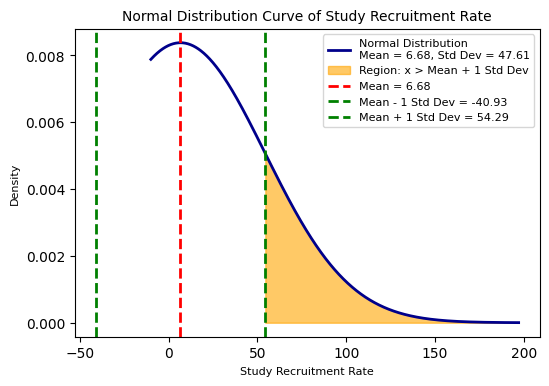

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


mean = np.mean(data1['Study Recruitment Rate'])
std_dev = np.std(data1['Study Recruitment Rate'])

# Generated a range of x values from -10 to mean + 4*std_dev
x = np.linspace(-10, mean + 4*std_dev, 1000)

# Calculate the corresponding y values for the normal distribution curve
y = stats.norm.pdf(x, mean, std_dev)

# Plot the normal distribution curve with high-contrast colors
plt.figure(figsize=(6, 4))  # Smaller figure size for better visibility in small format

# Plot the normal distribution curve
plt.plot(x, y, label=f'Normal Distribution\nMean = {mean:.2f}, Std Dev = {std_dev:.2f}', color='darkblue', linewidth=2)

# Fill the area under the curve for x > mean + 1 std_dev with a bright color
plt.fill_between(x, y, where=(x > mean + std_dev), color='orange', alpha=0.6, label='Region: x > Mean + 1 Std Dev')

# Add vertical lines for mean and ±1 standard deviation with thicker lines
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean = {mean:.2f}')
plt.axvline(mean - std_dev, color='green', linestyle='dashed', linewidth=2, label=f'Mean - 1 Std Dev = {mean - std_dev:.2f}')
plt.axvline(mean + std_dev, color='green', linestyle='dashed', linewidth=2, label=f'Mean + 1 Std Dev = {mean + std_dev:.2f}')

# Set labels and title with larger font for visibility in small size
plt.title('Normal Distribution Curve of Study Recruitment Rate', fontsize=10)
plt.xlabel('Study Recruitment Rate', fontsize=8)
plt.ylabel('Density', fontsize=8)

# Show legend with larger font size
plt.legend(fontsize=8)

# Save the plot as a PNG image
plt.savefig('normal_distribution_plot_small.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


## **Normal Distribution Curve of Study Recruitment Rate**

- This Normal distribution graph provides insight into key characteristics, variables, and potential outliter factors in recruitment rates, which help guide sampling decisions and ensure appropriate data interpretation.

---

### **Description:**
- **X-Axis:** Study Recruitment Rate.
- **Y-Axis:** Density (probability density function for the normal distribution).
- **Curve Features:**
  - **Blue Line:** Represents the normal distribution curve with a mean $(\mu$) of 6.68 and a standard deviation  $(\sigma$) of 47.61.
  - **Orange Region:** Indicates recruitment rates greater than ($mu + \sigma$).
  - **Red Dashed Line:** Marks the mean value $(\mu = 6.68$).
  - **Green Dashed Lines:** Mark one standard deviation below $(\mu - \sigma = -40.93$) and above the mean $(\mu + \sigma = 54.29$).
---


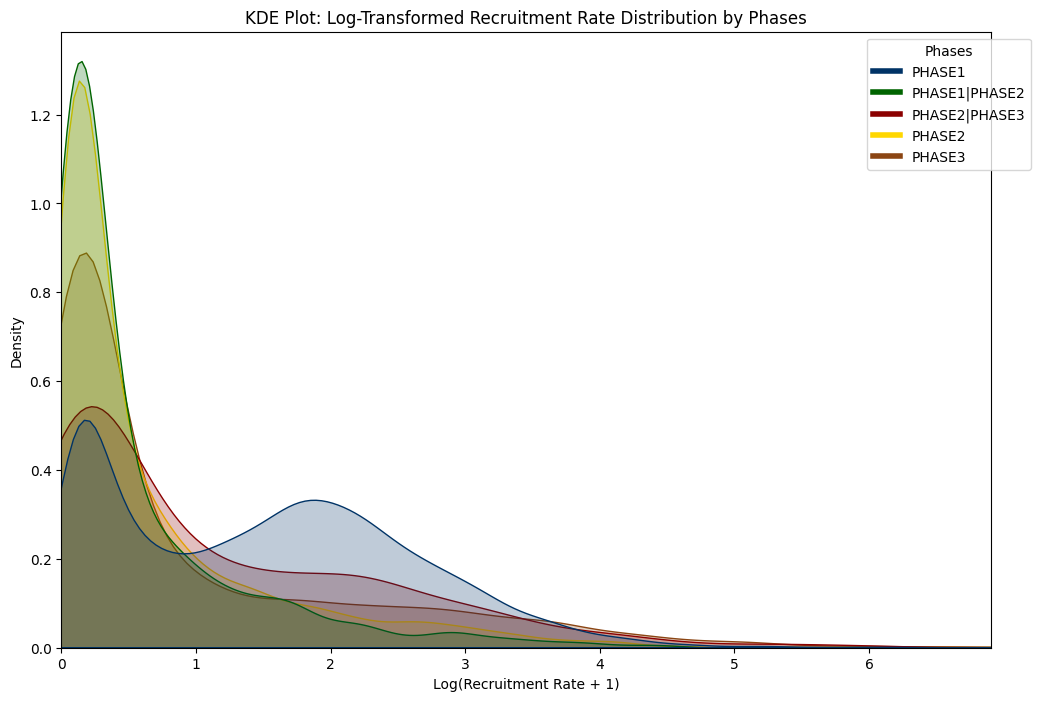

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Apply log transformation to avoid issues with zero values
data['Log_Recruitment_Rate'] = np.log1p(data['Study Recruitment Rate'])

# Set the figure size and style for better presentation
plt.figure(figsize=(12, 8))

# Manually define legend labels and corresponding darker colors for the provided 'Phases'
phase_colors_dark = {
    'PHASE1': '#003366',        # Very dark blue for PHASE1
    'PHASE1|PHASE2': '#006400', # Very dark green for PHASE1|PHASE2
    'PHASE2|PHASE3': '#8B0000', # Dark red for PHASE2|PHASE3
    'PHASE2': '#FFD700',        # Dark gold for PHASE2
    'PHASE3': '#8B4513',        # Dark brown for PHASE3
}

# KDE plot for the log-transformed recruitment rate with hue as 'Phases'
sns.kdeplot(data=data, x='Log_Recruitment_Rate', hue='Phases', fill=True, common_norm=False, palette=phase_colors_dark)

# Set the x-axis limits to be between 0 and log(1000)
plt.xlim(np.log1p(0), np.log1p(1000))

# Title and labels
plt.title('KDE Plot: Log-Transformed Recruitment Rate Distribution by Phases')
plt.xlabel('Log(Recruitment Rate + 1)')
plt.ylabel('Density')

# Manually define legend labels (matching categories)
legend_labels = list(phase_colors_dark.keys())  # List of phases
handles = [Line2D([0], [0], color=color, lw=4) for color in phase_colors_dark.values()]

# Display the custom legend with the title 'Phases'
plt.legend(handles=handles, labels=legend_labels, title="Phases", loc='upper right', bbox_to_anchor=(1.05, 1))

# Save the plot as a PNG image
plt.savefig('KDE Plot: Log-Transformed Recruitment Rate Distribution by Phases.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


## **KDE Plot: Log-Transformed Recruitment Rate Distribution by Phases**

- Visualize the distribution of the log-transformed recruitment rate across different study phases using a Kernel Density Estimation (KDE) plot. By which we know about the recruitment rate range\variation in the various Phases.
- From this graph know about the which phases have higher or more consistent recruitment rates.

---

### **Key Features of the Plot:**
   - Applied Log Transformation $ (log(\text{Recruitment Rate} + 1)) $ to handle zero or very small recruitment rates by normalizing the scale and preventing skewness.

   - KDE represents the smooth density distribution of recruitment rates across study phases.

---

### **Insights from the Plot:**
   - PHASE1 show broader peaks, indicating more variability in recruitment rates. Other phases show tighter distributions, implying more consistent rates.
   - Overlapping densities highlight similarities in recruitment rates across phases, while distinct peaks indicate unique patterns.

   - Long tails suggest the presence of studies with high recruitment rates in certain phases.
---

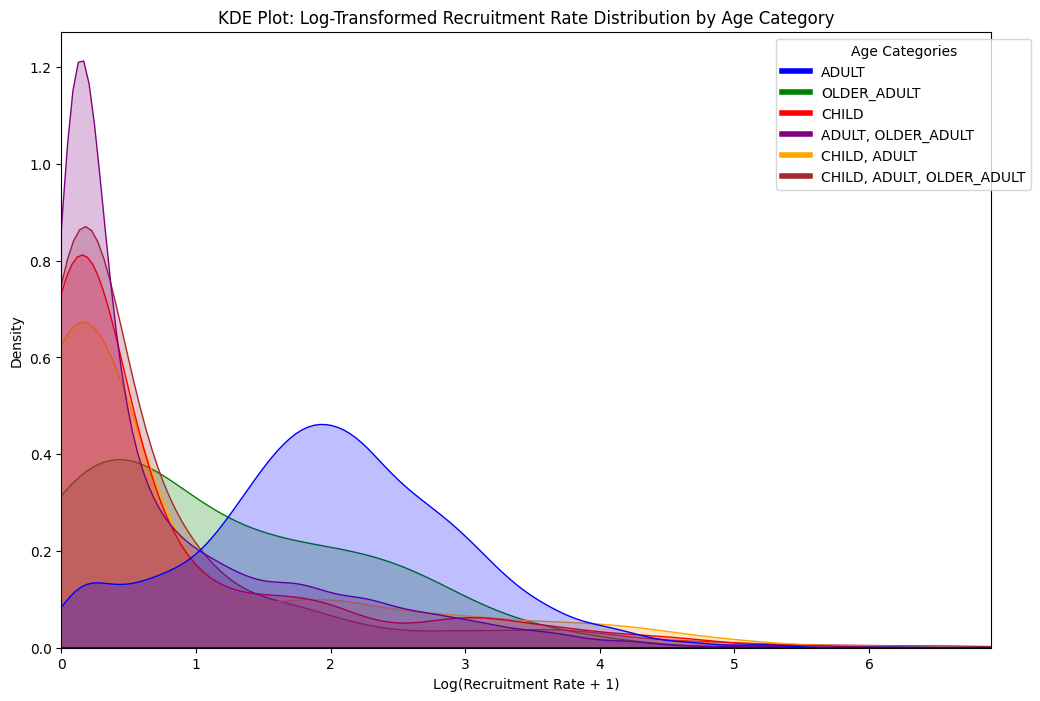

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Assuming 'data' is the DataFrame containing the 'Study Recruitment Rate' and 'Age' columns
# Apply log transformation (adding a small constant to avoid log(0))
data['Log_Recruitment_Rate'] = np.log1p(data['Study Recruitment Rate'])

# Manually map age categories to colors
age_category_colors = {
    'ADULT': 'blue',
    'OLDER_ADULT': 'green',
    'CHILD': 'red',
    'ADULT, OLDER_ADULT': 'purple',
    'CHILD, ADULT': 'orange',
    'CHILD, ADULT, OLDER_ADULT': 'brown'
}

# Ensure 'Age' is a categorical type for hue
data['Age'] = data['Age'].astype('category')

# Plot the KDE with log-transformed Recruitment Rate
plt.figure(figsize=(12, 8))

# KDE plot for the log-transformed recruitment rate with hue as 'Age'
sns.kdeplot(data=data, x='Log_Recruitment_Rate', hue='Age', fill=True, common_norm=False, palette=age_category_colors)

# Set the x-axis limits to be between 0 and log(1000)
plt.xlim(np.log1p(0), np.log1p(1000))


plt.title('KDE Plot: Log-Transformed Recruitment Rate Distribution by Age Category')
plt.xlabel('Log(Recruitment Rate + 1)')
plt.ylabel('Density')

# Custom Legend with age categories and corresponding colors
legend_labels = [
    'ADULT',
    'OLDER_ADULT',
    'CHILD',
    'ADULT, OLDER_ADULT',
    'CHILD, ADULT',
    'CHILD, ADULT, OLDER_ADULT'
]

# Created custom legend handles
handles = [Line2D([0], [0], color=color, lw=4) for color in age_category_colors.values()]

# Display the custom legend
plt.legend(handles=handles, labels=legend_labels, title="Age Categories", loc='upper right', bbox_to_anchor=(1.05, 1))

# Save the plot as a PNG image
plt.savefig('KDE Plot: Log-Transformed Recruitment Rate Distribution by Age Category.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


## **KDE Plot: Log-Transformed Recruitment Rate Distribution by Age Category**

- Analyze the distribution of log-transformed recruitment rates for different age categories using a Kernel Density Estimation (KDE) plot.

---

### **Insights from the Plot:**
- ADULT (Blue): Broader peak at higher rates, indicating frequent recruitment across studies.

- CHILD (Red): Sharper peak at lower rates, suggesting fewer children or lower variability in recruitment..

- OLDER_ADULT (Green): Lower density, indicating fewer studies target older adults.
- CHILD, ADULT (Orange) and ADULT, OLDER_ADULT (Purple): Overlapping distributions with individual categories, indicating similar recruitment patterns.
- CHILD, ADULT, OLDER_ADULT (Brown): Wider spread, representing studies targeting diverse age groups.

---


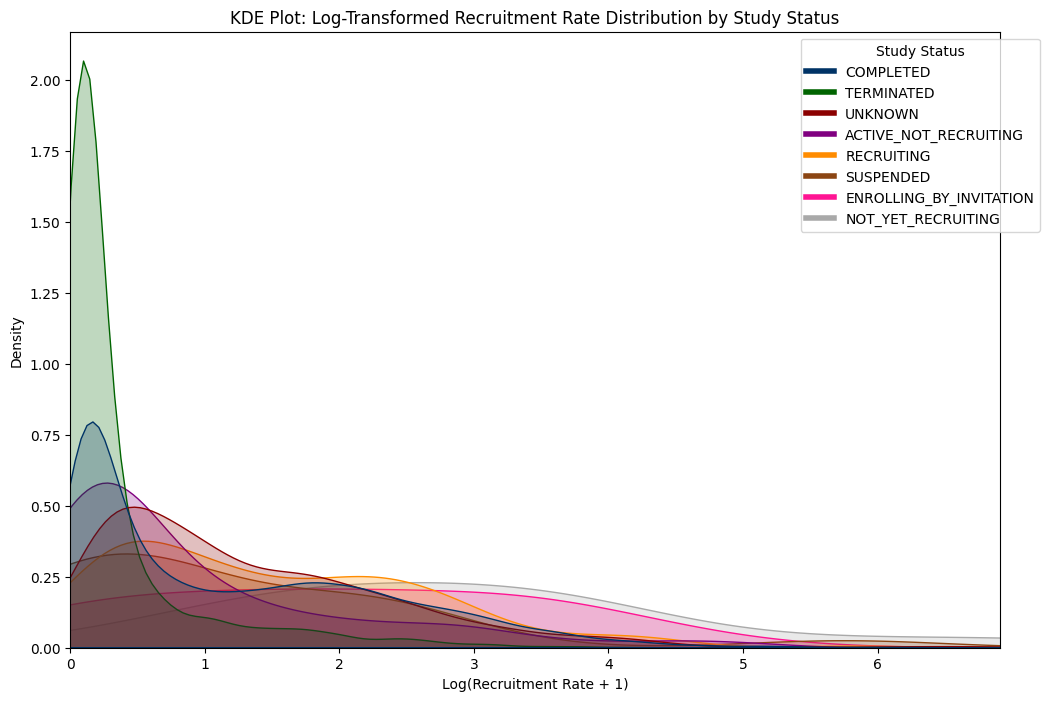

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Apply log transformation (adding a small constant to avoid log(0))
data['Log_Recruitment_Rate'] = np.log1p(data['Study Recruitment Rate'])

# Set the figure size and style for better presentation
plt.figure(figsize=(12, 8))

# Manually define legend labels and corresponding darker colors (adjusted manually)
study_status_colors_dark = {
    'COMPLETED': '#003366',  # Dark blue
    'TERMINATED': '#006400',  # Dark green
    'UNKNOWN': '#8B0000',  # Dark red
    'ACTIVE_NOT_RECRUITING': '#800080',  # Dark purple
    'RECRUITING': '#FF8C00',  # Dark orange
    'SUSPENDED': '#8B4513',  # Dark brown
    'ENROLLING_BY_INVITATION': '#FF1493',  # Dark pink
    'NOT_YET_RECRUITING': '#A9A9A9'  # Dark gray
}

# KDE plot for the log-transformed recruitment rate with hue as 'Study Status'
sns.kdeplot(data=data, x='Log_Recruitment_Rate', hue='Study Status', fill=True, common_norm=False, palette=study_status_colors_dark)

# Set the x-axis limits to be between 0 and log(1000)
plt.xlim(np.log1p(0), np.log1p(1000))

# Title and labels
plt.title('KDE Plot: Log-Transformed Recruitment Rate Distribution by Study Status')
plt.xlabel('Log(Recruitment Rate + 1)')
plt.ylabel('Density')

# Manually define legend labels (matching categories)
legend_labels = list(study_status_colors_dark.keys())  # List of study statuses
handles = [Line2D([0], [0], color=color, lw=4) for color in study_status_colors_dark.values()]

# Display the custom legend with the title 'Study Status'
plt.legend(handles=handles, labels=legend_labels, title="Study Status", loc='upper right', bbox_to_anchor=(1.05, 1))

# Save the plot as a PNG image
plt.savefig('KDE Plot: Log-Transformed Recruitment Rate Distribution by Study Status.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


## **KDE Plot: Log-Transformed Recruitment Rate Distribution by Study Status**

-  Analyze the distribution of log-transformed recruitment rates across different study statuses using a Kernel Density Estimation (KDE) plot.


---

### **Insights from the Plot:**
- COMPLETED (blue): Displays a wide density, indicating more consistent recruitment rates for completed studies.
- RECRUITING (Orange): displays a sharp peak at low recruitment rates, indicating that active recruitment is focusing on fewer participants.
- TERMINATED (Green): high peak values ​​close to zero, indicating low recruitment rates in TERMINATED.
- ACTIVE_NOT_RECRUITING (purple): Overlaps significantly with completed studies, indicating similar recruitment patterns.
- UNKNOWN (Brown): shows considerable expansion, indicating changes in recruitment rates due to unclear conditions.
- Recruitment rates are more consistent for completed studies and more variable for statuses like SUSPENDED or UNKNOWN.
- Lower recruitment rates dominate for NOT_YET_RECRUITING and ENROLLING_BY_INVITATION.

---


In [ ]:
data1.head(4)

,NCT Number,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sex,...,Funder Type,Study Type,Study Design,Completion Date,First Posted,Results First Posted,Last Update Posted,Study Recruitment Rate,Duration of Trial,Primary Completion Duration of Trial
0,NCT00900809,QUILT-3.018: Neukoplastâ„¢ (NK-92) for the Tre...,COMPLETED,NK cells from patients with malignant diseases...,NO,Acute Myeloid Leukemia,BIOLOGICAL: Neukoplastâ„¢ (NK-92),Determine the safety / maximum tolerated dose ...,Evaluate the therapeutic efficacy of Neukoplas...,ALL,...,INDUSTRY,INTERVENTIONAL,Allocation: NA|Intervention Model: SINGLE_GROU...,2015-06-02,2009-05-13,NaT,2022-04-05,0.551598,386,386.0
1,NCT01113515,Clinical Investigation of GalnobaxÂ® for the T...,COMPLETED,The purpose of this study is to determine safe...,YES,Diabetic Foot Ulcer,DRUG: Esmolol hydrochloride|DRUG: Esmolol hydr...,"Safety Outcome, Number of participant with adv...","Efficacy Outcome, To evaluate the percent chan...",ALL,...,INDUSTRY,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2015-10-17,2010-04-30,2024-05-20,2024-05-20,0.443157,604,492.0
2,NCT01288573,A Combined Study in Pediatric Cancer Patients ...,COMPLETED,This is a multi-site study with plerixafor in ...,NO,Ewing's Sarcoma/Soft Tissue Sarcoma|Neuroblast...,DRUG: plerixafor|DRUG: plerixafor|DRUG: plerix...,Proportion of patients achieving at least a do...,Number of days of apheresis required to reach ...,ALL,...,INDUSTRY,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2017-05-09,2011-02-02,NaT,2017-05-16,0.044558,1163,1163.0
3,NCT01336660,A Trial of Equine F (ab')2 Antivenom for Treat...,COMPLETED,This study has the objective to demonstrate th...,NO,Poisoning by Scorpion Sting,BIOLOGICAL: Equine F(ab')2 antivenom|OTHER: In...,To demonstrate the effectiveness of Alacramyn ...,Effectiveness of Alacramyn NAMO in the treatme...,ALL,...,INDUSTRY,INTERVENTIONAL,Allocation: RANDOMIZED|Intervention Model: PAR...,2018-11-15,2011-04-18,NaT,2018-12-13,7.279202,117,103.0


## **Binary Encoding of Phases**

-  Convert multi-category column `Phases` into binary columns for easier analysis and modeling.
- After converting the Phases column into numerical columns, we can clearly identify which phase is present or not in particular row.

---

### **Steps:**

   - The `Phases` column is split into lists of individual categories using `str.split('|')`.
   - Each list is expanded into separate rows using the `explode()` function.
   - Binary columns (`Phase1`, `Phase2`, `Phase3`) are added, with a value of 1 if the corresponding phase exists and 0 otherwise.
   - Binary columns are aggregated back to the original structure by taking the maximum value for each phase.
   - The binary columns are merged into the original dataset.
   - Intermediate columns like `Phases_split` are dropped for clarity.

---

In [ ]:
# Step 1: Split combined categories into lists
data1['Phases_split'] = data1['Phases'].str.split('|')

# Step 2: Explode the lists into separate rows
data1_exploded = data1.explode('Phases_split')

# Step 3: Add binary columns for each unique category
data1_exploded['Phase1'] = (data1_exploded['Phases_split'] == 'PHASE1').astype(int)
data1_exploded['Phase2'] = (data1_exploded['Phases_split'] == 'PHASE2').astype(int)
data1_exploded['Phase3'] = (data1_exploded['Phases_split'] == 'PHASE3').astype(int)

# Step 4: Aggregate the binary columns back to the original structure
binary_columns = ['Phase1', 'Phase2', 'Phase3']
data1_binary = data1_exploded.groupby(level=0)[binary_columns].max()

# Step 5: Merge the binary columns back into the original dataset
data1 = data1.merge(data1_binary, left_index=True, right_index=True)

# Step 6: Drop intermediate columns if necessary
data1 = data1.drop(columns=['Phases_split'])

# Display the updated dataset
data1.head(3)

,NCT Number,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sex,...,Completion Date,First Posted,Results First Posted,Last Update Posted,Study Recruitment Rate,Duration of Trial,Primary Completion Duration of Trial,Phase1,Phase2,Phase3
0,NCT00900809,QUILT-3.018: Neukoplastâ„¢ (NK-92) for the Tre...,COMPLETED,NK cells from patients with malignant diseases...,NO,Acute Myeloid Leukemia,BIOLOGICAL: Neukoplastâ„¢ (NK-92),Determine the safety / maximum tolerated dose ...,Evaluate the therapeutic efficacy of Neukoplas...,ALL,...,2015-06-02,2009-05-13,NaT,2022-04-05,0.551598,386,386.0,1,0,0
1,NCT01113515,Clinical Investigation of GalnobaxÂ® for the T...,COMPLETED,The purpose of this study is to determine safe...,YES,Diabetic Foot Ulcer,DRUG: Esmolol hydrochloride|DRUG: Esmolol hydr...,"Safety Outcome, Number of participant with adv...","Efficacy Outcome, To evaluate the percent chan...",ALL,...,2015-10-17,2010-04-30,2024-05-20,2024-05-20,0.443157,604,492.0,1,1,0
2,NCT01288573,A Combined Study in Pediatric Cancer Patients ...,COMPLETED,This is a multi-site study with plerixafor in ...,NO,Ewing's Sarcoma/Soft Tissue Sarcoma|Neuroblast...,DRUG: plerixafor|DRUG: plerixafor|DRUG: plerix...,Proportion of patients achieving at least a do...,Number of days of apheresis required to reach ...,ALL,...,2017-05-09,2011-02-02,NaT,2017-05-16,0.044558,1163,1163.0,1,1,0


## **Inclusion of the Phase Column**

The `Phase` column was included in the dataset by applying binary encoding. This feature is critical as the phase of a clinical trial significantly impacts the recruitment rate and needs to be accounted for in the model.

## **Dropping the Original Phases Columns**

The original `Phases` columns were dropped from the dataset as their information was transformed into categorical columns under the `Phase` category. This ensures better representation and utilization of the data in the model, while avoiding redundancy.

In [ ]:
data1.drop(['Phases'],axis='columns',inplace=True)
data1.columns

Index(['NCT Number', 'Study Title', 'Study Status', 'Brief Summary',
       'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures', 'Sex', 'Age',
       'Enrollment', 'Funder Type', 'Study Type', 'Study Design',
       'Completion Date', 'First Posted', 'Results First Posted',
       'Last Update Posted', 'Study Recruitment Rate', 'Duration of Trial',
       'Primary Completion Duration of Trial', 'Phase1', 'Phase2', 'Phase3'],
      dtype='object')

In [ ]:
data1.head(4)

,NCT Number,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sex,...,Completion Date,First Posted,Results First Posted,Last Update Posted,Study Recruitment Rate,Duration of Trial,Primary Completion Duration of Trial,Phase1,Phase2,Phase3
0,NCT00900809,QUILT-3.018: Neukoplastâ„¢ (NK-92) for the Tre...,COMPLETED,NK cells from patients with malignant diseases...,NO,Acute Myeloid Leukemia,BIOLOGICAL: Neukoplastâ„¢ (NK-92),Determine the safety / maximum tolerated dose ...,Evaluate the therapeutic efficacy of Neukoplas...,ALL,...,2015-06-02,2009-05-13,NaT,2022-04-05,0.551598,386,386.0,1,0,0
1,NCT01113515,Clinical Investigation of GalnobaxÂ® for the T...,COMPLETED,The purpose of this study is to determine safe...,YES,Diabetic Foot Ulcer,DRUG: Esmolol hydrochloride|DRUG: Esmolol hydr...,"Safety Outcome, Number of participant with adv...","Efficacy Outcome, To evaluate the percent chan...",ALL,...,2015-10-17,2010-04-30,2024-05-20,2024-05-20,0.443157,604,492.0,1,1,0
2,NCT01288573,A Combined Study in Pediatric Cancer Patients ...,COMPLETED,This is a multi-site study with plerixafor in ...,NO,Ewing's Sarcoma/Soft Tissue Sarcoma|Neuroblast...,DRUG: plerixafor|DRUG: plerixafor|DRUG: plerix...,Proportion of patients achieving at least a do...,Number of days of apheresis required to reach ...,ALL,...,2017-05-09,2011-02-02,NaT,2017-05-16,0.044558,1163,1163.0,1,1,0
3,NCT01336660,A Trial of Equine F (ab')2 Antivenom for Treat...,COMPLETED,This study has the objective to demonstrate th...,NO,Poisoning by Scorpion Sting,BIOLOGICAL: Equine F(ab')2 antivenom|OTHER: In...,To demonstrate the effectiveness of Alacramyn ...,Effectiveness of Alacramyn NAMO in the treatme...,ALL,...,2018-11-15,2011-04-18,NaT,2018-12-13,7.279202,117,103.0,0,1,1


## **Binary Encoding of Age Categories**

- Convert the multi-category `Age` column into binary columns for simplified analysis and modeling.
- In this case, we can also determine which category is present in a particular column after converting it into binary format.

---

### **Steps:**
   - The `Age` column is split into a list of categories using `str.split(',')`, and any leading or trailing spaces are removed using `strip()`.
   - Each list of age categories is expanded into separate rows using the `explode()` function.
   - Binary columns (`Age_CHILD`, `Age_ADULT`, `Age_OLDER_ADULT`) are added, with a value of 1 if the corresponding age category exists and 0 otherwise.
   - Binary columns are aggregated back to the original structure by taking the maximum value for each category.
   - The binary columns are merged into the original dataset for enhanced usability.
   - Intermediate columns like `Age_split` are dropped for better clarity.
---

In [ ]:
# Step 1: Split combined categories into lists and remove any leading/trailing spaces
data1['Age_split'] = data1['Age'].str.split(',').apply(lambda x: [item.strip() for item in x])

# Step 2: Explode the lists into separate rows
data1_exploded = data1.explode('Age_split')

# Step 3: Add binary columns for each unique category
data1_exploded['Age_CHILD'] = (data1_exploded['Age_split'] == 'CHILD').astype(int)
data1_exploded['Age_ADULT'] = (data1_exploded['Age_split'] == 'ADULT').astype(int)
data1_exploded['Age_OLDER_ADULT'] = (data1_exploded['Age_split'] == 'OLDER_ADULT').astype(int)

# Step 4: Aggregate the binary columns back to the original structure
binary_columns = ['Age_CHILD', 'Age_ADULT', 'Age_OLDER_ADULT']
data1_binary = data1_exploded.groupby(level=0)[binary_columns].max()

# Step 5: Merge the binary columns back into the original dataset
data1 = data1.merge(data1_binary, left_index=True, right_index=True)

# Step 6: Drop intermediate columns if necessary
data1 = data1.drop(columns=['Age_split'])

# Display the updated dataset
data1.head(3)


,NCT Number,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sex,...,Last Update Posted,Study Recruitment Rate,Duration of Trial,Primary Completion Duration of Trial,Phase1,Phase2,Phase3,Age_CHILD,Age_ADULT,Age_OLDER_ADULT
0,NCT00900809,QUILT-3.018: Neukoplastâ„¢ (NK-92) for the Tre...,COMPLETED,NK cells from patients with malignant diseases...,NO,Acute Myeloid Leukemia,BIOLOGICAL: Neukoplastâ„¢ (NK-92),Determine the safety / maximum tolerated dose ...,Evaluate the therapeutic efficacy of Neukoplas...,ALL,...,2022-04-05,0.551598,386,386.0,1,0,0,0,1,1
1,NCT01113515,Clinical Investigation of GalnobaxÂ® for the T...,COMPLETED,The purpose of this study is to determine safe...,YES,Diabetic Foot Ulcer,DRUG: Esmolol hydrochloride|DRUG: Esmolol hydr...,"Safety Outcome, Number of participant with adv...","Efficacy Outcome, To evaluate the percent chan...",ALL,...,2024-05-20,0.443157,604,492.0,1,1,0,0,1,1
2,NCT01288573,A Combined Study in Pediatric Cancer Patients ...,COMPLETED,This is a multi-site study with plerixafor in ...,NO,Ewing's Sarcoma/Soft Tissue Sarcoma|Neuroblast...,DRUG: plerixafor|DRUG: plerixafor|DRUG: plerix...,Proportion of patients achieving at least a do...,Number of days of apheresis required to reach ...,ALL,...,2017-05-16,0.044558,1163,1163.0,1,1,0,1,1,0


## **Inclusion of the Age Column**

The `Age` column was included in the dataset by applying binary encoding. This feature is essential as the age of participants plays a significant role in determining the recruitment rate and must be considered in the model.

In [ ]:
data1=data1.drop(['Study Type','Last Update Posted','Results First Posted','First Posted','Funder Type'],axis='columns')

## **Dropping Additional Columns**

The following columns were dropped from the dataset for the specified reasons:

- **Study Type**: This column has the value `INTERVENTIONAL` for all rows, contributing no variability or useful information for the model.

- **Results First Posted**: This column contains over 13,002 missing rows, making it an unreliable contributor to the model due to the high percentage of missing data.

- **First Posted**: This column represents the date on which the first result of the trial was posted on the clinicaltrials.gov website. It is irrelevant to the recruitment process of the trial and was thus excluded.

- **Last Update Posted** and **Funder Type**: These columns were also dropped as they do not provide meaningful information for predicting the recruitment rate.

In [ ]:
data1.columns

Index(['NCT Number', 'Study Title', 'Study Status', 'Brief Summary',
       'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures', 'Sex', 'Age',
       'Enrollment', 'Study Design', 'Completion Date',
       'Study Recruitment Rate', 'Duration of Trial',
       'Primary Completion Duration of Trial', 'Phase1', 'Phase2', 'Phase3',
       'Age_CHILD', 'Age_ADULT', 'Age_OLDER_ADULT'],
      dtype='object')

In [ ]:
target = data1['Study Recruitment Rate']

## **Defining the Target Variable**

- Extract the `Study Recruitment Rate` column as the target variable for predictive modeling.
- The target variable (`target`) represents the outcome we aim to predict using the features in the dataset.



In [ ]:
import pandas as pd
import numpy as np


bin_width = 10
bins = np.arange(data1['Study Recruitment Rate'].min(), data1['Study Recruitment Rate'].max() + bin_width, bin_width)

# Create bins and categorize the target variable
data1['Cluster'] = pd.cut(data1['Study Recruitment Rate'], bins=bins, right=False)

# Count the number of data points in each cluster
cluster_counts = data1['Cluster'].value_counts().sort_index()

# Display the clusters
print(cluster_counts.head(15))

Cluster
[0.00113, 10.001)     17665
[10.001, 20.001)       1645
[20.001, 30.001)        594
[30.001, 40.001)        283
[40.001, 50.001)        143
[50.001, 60.001)         80
[60.001, 70.001)         75
[70.001, 80.001)         44
[80.001, 90.001)         15
[90.001, 100.001)        19
[100.001, 110.001)       18
[110.001, 120.001)       10
[120.001, 130.001)        3
[130.001, 140.001)        3
[140.001, 150.001)        7
Name: count, dtype: int64


## **Clustering Target Variable into Bins**

- Group the `Study Recruitment Rate` into clusters (bins) for better analysis and visualization of the data distribution.
- Provides insights into how recruitment rates are distributed across the dataset. Using this, we can accurately identify high and low recruitment rate ranges and detect anomalies.

---

### **Steps:**

   - A bin width of 10 is specified, dividing the range of the `Study Recruitment Rate` into intervals of 10 units.
   - The `pd.cut()` function is used to categorize the `Study Recruitment Rate` into bins.
   - Bins are defined from the minimum to the maximum value of the target variable, ensuring no overlap.
   - Each data point is assigned to a corresponding bin (cluster) based on its value.
   - The `value_counts()` function counts the number of data points in each bin and sorts the bins in ascending order.
---

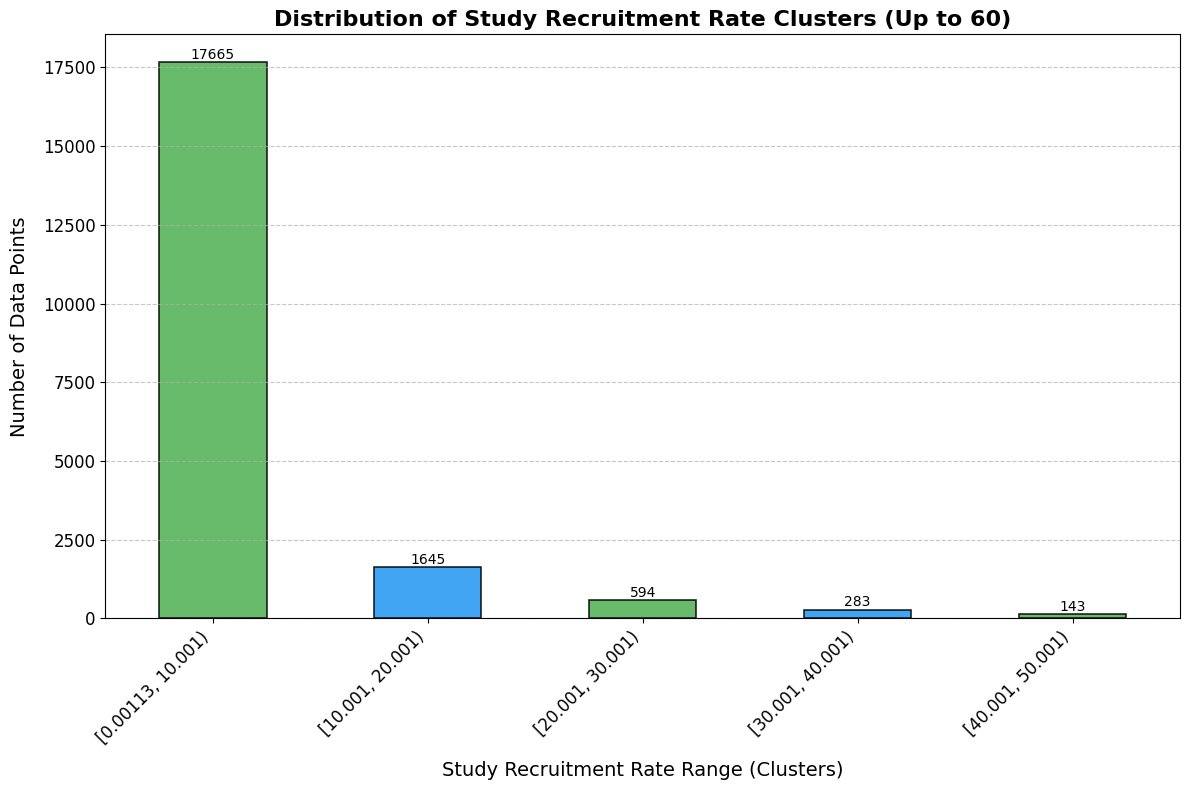

In [ ]:
import matplotlib.pyplot as plt

# Filter cluster_counts using the right boundary of the intervals
filtered_cluster_counts = cluster_counts[cluster_counts.index.categories.right <= 60]

# Creating the bar chart
plt.figure(figsize=(12, 8))
bars = filtered_cluster_counts.sort_index().plot(
    kind='bar',
    color=['#4CAF50' if i % 2 == 0 else '#2196F3' for i in range(len(filtered_cluster_counts))],
    edgecolor='black',
    alpha=0.85,
    linewidth=1.2
)

# Adding gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding labels and title
plt.title('Distribution of Study Recruitment Rate Clusters (Up to 60)', fontsize=16, fontweight='bold')
plt.xlabel('Study Recruitment Rate Range (Clusters)', fontsize=14, labelpad=10)
plt.ylabel('Number of Data Points', fontsize=14, labelpad=10)

# Customize x-axis ticks
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Annotate bars with values
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Tight layout for better spacing
plt.tight_layout()

plt.show()


## **Bar Chart of Filtered Clusters**

-  Visualize the distribution of data points in recruitment rate clusters, filtered to include clusters with an upper boundary of 60.
- It provides a clear visualization of the concentration of recruitment rates in different clusters.

---

### **Steps:**

   - The cluster counts are filtered to include only bins with an upper boundary $(\leq 60$).

   - The filtered cluster counts are plotted as a bar chart using the `plot(kind='bar')` function.

   - **Bar Color:** Sky blue for visual clarity.
   - **Edge Color:** Black to emphasize individual bars.
   - **Labels and Title:** Added to provide context to the chart.
   - **X-Axis Rotation:** Rotated for better readability.

---

In [ ]:
data1.columns

Index(['NCT Number', 'Study Title', 'Study Status', 'Brief Summary',
       'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures', 'Sex', 'Age',
       'Enrollment', 'Study Design', 'Completion Date',
       'Study Recruitment Rate', 'Duration of Trial',
       'Primary Completion Duration of Trial', 'Phase1', 'Phase2', 'Phase3',
       'Age_CHILD', 'Age_ADULT', 'Age_OLDER_ADULT', 'Cluster'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

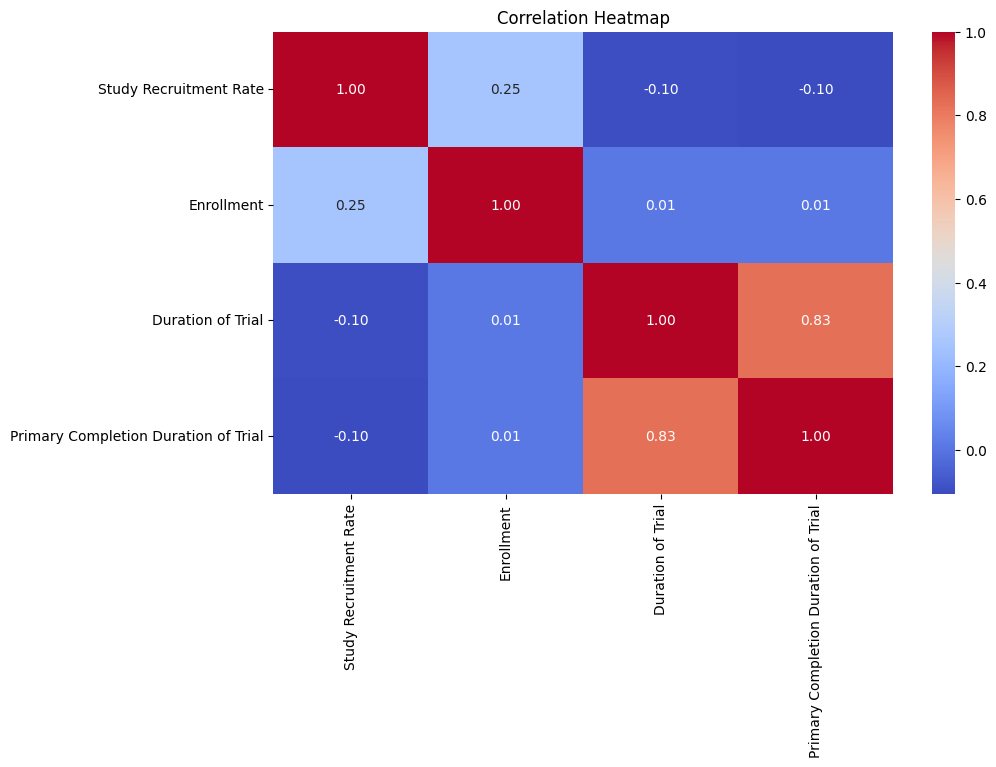

In [ ]:
numerical_cols = ['Study Recruitment Rate', 'Enrollment', 'Duration of Trial', 'Primary Completion Duration of Trial']


# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data1[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## **Correlation Heatmap of Numerical Features**

### **Key Steps**
1. **Calculate Correlation**:
   - Used the `corr()` function to compute pairwise correlation coefficients among the selected features.
2. **Visualize Correlation**:
   - Plotted the correlation matrix using the `sns.heatmap()` function from the Seaborn library.
   - Key configurations for the heatmap:
     - **Annotations:** Correlation coefficients displayed on the heatmap.
     - **Color Map:** `coolwarm` to highlight positive (red) and negative (blue) correlations.

### **Observations**
- **Correlation with `Study Recruitment Rate`:**
  - `Enrollment` has a moderate positive correlation (`0.25`), suggesting that higher enrollment may be associated with a higher recruitment rate.
  - `Duration of Trial` and `Primary Completion Duration of Trial` have weak negative correlations (`-0.10` each) with `Study Recruitment Rate`, indicating that longer trial durations slightly decrease recruitment rates.

### **Arguments for Feature Inclusion**
1. **`Enrollment`**:
   - Despite a moderate correlation (`0.25`), it provides meaningful information about the scale of the trial, which could influence recruitment dynamics.
   - Enrollment size is a critical factor in recruitment strategy and performance.

2. **`Duration of Trial`**:
   - Although the correlation is weak, it highlights an inverse relationship with recruitment rates.
   - Longer durations may reflect trials with complex protocols or rare conditions, which could influence recruitment outcomes.

3. **`Primary Completion Duration of Trial`**:
   - Strongly correlated with `Duration of Trial` (`0.83`), but capturing slightly different aspects of trial timelines.
   - It can complement `Duration of Trial` in understanding how timelines impact recruitment dynamics.

### **Insights**
- The inclusion of these features is justified as they provide complementary perspectives on trial size, duration, and timelines.
- Weak correlations highlight the need for additional features to better explain variability in `Study Recruitment Rate`.
- These features contribute to capturing trends in trial characteristics that could influence recruitment performance.

In [ ]:
# shows unique categories for columns with fewer than 10 categories
for column in data1.columns:
    unique_values = data1[column].unique()
    num_unique = len(unique_values)

    if num_unique < 10:  # shows only if categories are fewer than 10
        print(f"Column: {column}")
        print(f"Unique Categories ({num_unique}): {unique_values}")
        print("_" * 40)


Column: Study Status
Unique Categories (8): ['COMPLETED' 'UNKNOWN' 'TERMINATED' 'ACTIVE_NOT_RECRUITING' 'RECRUITING'
 'SUSPENDED' 'ENROLLING_BY_INVITATION' 'NOT_YET_RECRUITING']
________________________________________
Column: Study Results
Unique Categories (2): ['NO' 'YES']
________________________________________
Column: Sex
Unique Categories (4): ['ALL' 'FEMALE' 'MALE' nan]
________________________________________
Column: Age
Unique Categories (6): ['ADULT, OLDER_ADULT' 'CHILD, ADULT' 'CHILD' 'CHILD, ADULT, OLDER_ADULT'
 'ADULT' 'OLDER_ADULT']
________________________________________
Column: Phase1
Unique Categories (2): [1 0]
________________________________________
Column: Phase2
Unique Categories (2): [0 1]
________________________________________
Column: Phase3
Unique Categories (2): [0 1]
________________________________________
Column: Age_CHILD
Unique Categories (2): [0 1]
________________________________________
Column: Age_ADULT
Unique Categories (2): [1 0]
_______________

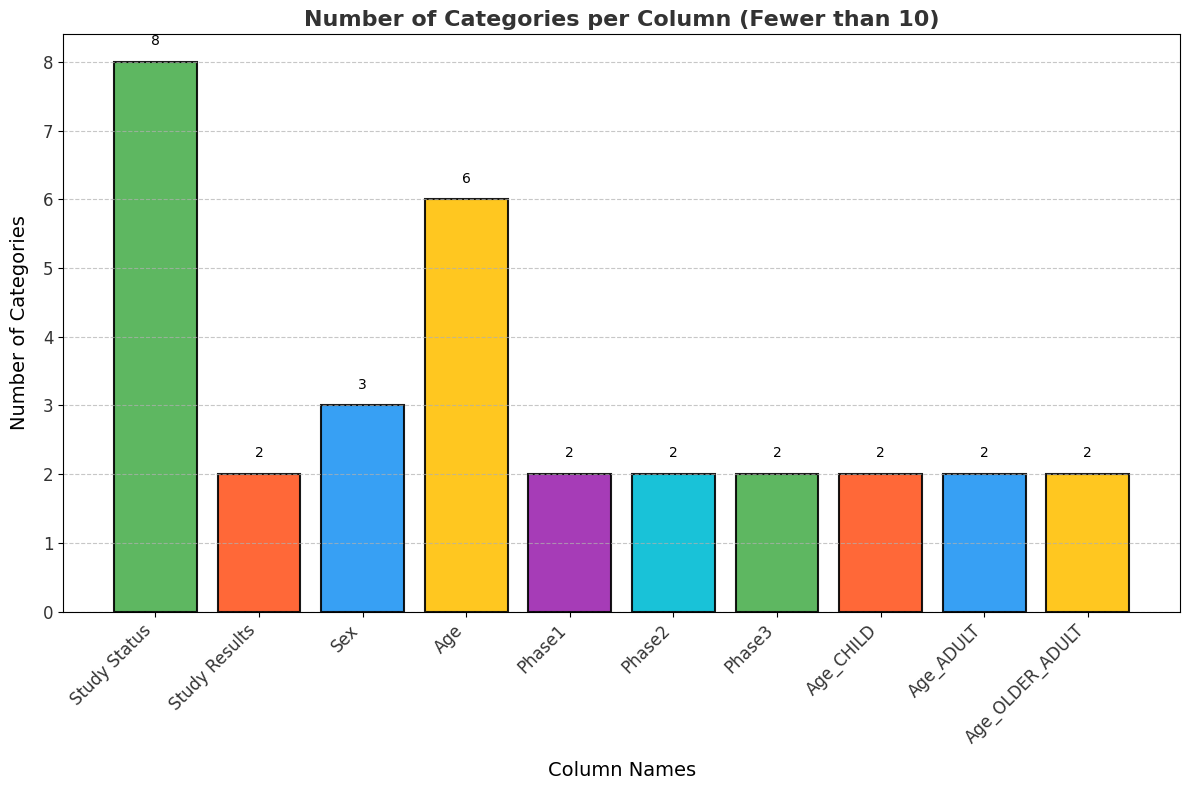

In [ ]:
import matplotlib.pyplot as plt


category_counts = {column: data1[column].nunique()
                   for column in data1.columns
                   if data1[column].nunique() < 10}

colors = ['#4CAF50', '#FF5722', '#2196F3', '#FFC107', '#9C27B0', '#00BCD4']
plt.figure(figsize=(12, 8))
bars = plt.bar(
    category_counts.keys(),
    category_counts.values(),
    color=[colors[i % 6] for i in range(len(category_counts))],
    edgecolor='black',
    linewidth=1.5,
    alpha=0.9
)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Number of Categories per Column (Fewer than 10)', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Column Names', fontsize=14, labelpad=10)
plt.ylabel('Number of Categories', fontsize=14, labelpad=10)

plt.xticks(rotation=45, ha='right', fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.2,
        str(height),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.tight_layout()

plt.show()


## **Exploration of Unique Categories in Categorical Columns**

### **Results Obtained**

1. **`Study Status`**:
   - **Unique Categories (8)**: `['COMPLETED', 'UNKNOWN', 'TERMINATED', 'ACTIVE_NOT_RECRUITING', 'RECRUITING', 'SUSPENDED', 'ENROLLING_BY_INVITATION', 'NOT_YET_RECRUITING']`
   - **Insight**: Represents the current status of each clinical trial. These categories are useful for understanding recruitment progress and filtering specific statuses.

2. **`Study Results`**:
   - **Unique Categories (2)**: `['NO', 'YES']`
   - **Insight**: Indicates whether study results are available. This binary variable can be directly utilized in the model.

3. **`Sex`**:
   - **Unique Categories (4)**: `['ALL', 'FEMALE', 'MALE', nan]`
   - **Insight**: Denotes the targeted sex of participants. The presence of `nan` suggests missing values that need imputation or handling.

4. **`Age`**:
   - **Unique Categories (6)**: `['ADULT, OLDER_ADULT', 'CHILD, ADULT', 'CHILD', 'CHILD, ADULT, OLDER_ADULT', 'ADULT', 'OLDER_ADULT']`
   - **Insight**: Represents the age groups targeted in trials. This variability highlights the need to simplify or encode these categories effectively.

5. **`Phase1`, `Phase2`, `Phase3`**:
   - **Unique Categories (2)**: `[0, 1]` for each column.
   - **Insight**: Encoded binary variables indicating trial phases. These features are already in a format suitable for modeling.

6. **`Age_CHILD`, `Age_ADULT`, `Age_OLDER_ADULT`**:
   - **Unique Categories (2)**: `[0, 1]` for each column.
   - **Insight**: Binary encoding of age categories. These columns enhance the granularity of participant demographics.

---

### **Insights**
- **Compact Categories**: Columns like `Study Results` and `Phase` are already in binary form, simplifying their use in the model.
- **Diverse Categories**: Columns like `Study Status` and `Age` contain more categories and may require further preprocessing (e.g., encoding or grouping similar categories).
- **Missing Data**: The presence of `nan` in the `Sex` column requires handling to ensure model robustness.
- **Binary Encodings**: Columns such as `Phase1`, `Phase2`, and `Phase3`, along with age-based binary encodings, are ready for direct inclusion in the model.


In [ ]:
# Adjusted pandas shows options to prevent truncation
pd.set_option('display.max_colwidth', None)

data1['Study Design'].head(4)

,Study Design
0,Allocation: NA|Intervention Model: SINGLE_GROUP|Masking: NONE|Primary Purpose: TREATMENT
1,"Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: TRIPLE (PARTICIPANT, CARE_PROVIDER, INVESTIGATOR)|Primary Purpose: TREATMENT"
2,Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: NONE|Primary Purpose: TREATMENT
3,"Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: QUADRUPLE (PARTICIPANT, CARE_PROVIDER, INVESTIGATOR, OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT"


In [ ]:
# Splited the 'System Design' column into multiple components using | as a separator
split_columns = data1['Study Design'].str.split('|', expand=True)
for col in split_columns.columns:
    key_value = split_columns[col].str.split(':', expand=True)
    key = key_value[0].str.strip()
    value = key_value[1].str.strip()
    data1[key[0]] = value

# Dropped the original 'System Design' column after splitting
data1 = data1.drop(columns=['Study Design'])

## **Analysis and Transformation of the `Study Design` Column**

### **Observations**
- The `Study Design` column contains structured information separated by `|`, with components like `Allocation`, `Intervention Model`, `Masking`, and `Primary Purpose`.

### **Transformation**
1. **Splitting**:
   - The column was split into multiple attributes (e.g., `Allocation`, `Intervention Model`) using the `|` delimiter.
2. **Key-Value Extraction**:
   - Each segment (e.g., `Allocation: RANDOMIZED`) was split into keys (e.g., `Allocation`) and values (e.g., `RANDOMIZED`) for better organization.
3. **Original Column Dropped**:
   - The original column was removed after splitting to avoid redundancy.

### **Benefits**
- **Improved Trends Analysis**: Enables detailed analysis of individual trial design attributes.
- **Enhanced Model Input**: Provides granular features for better predictive modeling.
- **Simplified Filtering**: Facilitates independent analysis of attributes like `Masking` or `Primary Purpose`.

### **Further Use**
- The transformed data will improve trend analysis and feature engineering for modeling recruitment rates.

In [ ]:
# Reset pandas shows options to default for max_colwidth
pd.reset_option('display.max_colwidth')

data1.head(3)

,NCT Number,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sex,...,Phase2,Phase3,Age_CHILD,Age_ADULT,Age_OLDER_ADULT,Cluster,Allocation,Intervention Model,Masking,Primary Purpose
0,NCT00900809,QUILT-3.018: Neukoplastâ„¢ (NK-92) for the Tre...,COMPLETED,NK cells from patients with malignant diseases...,NO,Acute Myeloid Leukemia,BIOLOGICAL: Neukoplastâ„¢ (NK-92),Determine the safety / maximum tolerated dose ...,Evaluate the therapeutic efficacy of Neukoplas...,ALL,...,0,0,0,1,1,"[0.00113, 10.001)",NA,SINGLE_GROUP,NONE,TREATMENT
1,NCT01113515,Clinical Investigation of GalnobaxÂ® for the T...,COMPLETED,The purpose of this study is to determine safe...,YES,Diabetic Foot Ulcer,DRUG: Esmolol hydrochloride|DRUG: Esmolol hydr...,"Safety Outcome, Number of participant with adv...","Efficacy Outcome, To evaluate the percent chan...",ALL,...,1,0,0,1,1,"[0.00113, 10.001)",RANDOMIZED,PARALLEL,"TRIPLE (PARTICIPANT, CARE_PROVIDER, INVESTIGATOR)",TREATMENT
2,NCT01288573,A Combined Study in Pediatric Cancer Patients ...,COMPLETED,This is a multi-site study with plerixafor in ...,NO,Ewing's Sarcoma/Soft Tissue Sarcoma|Neuroblast...,DRUG: plerixafor|DRUG: plerixafor|DRUG: plerix...,Proportion of patients achieving at least a do...,Number of days of apheresis required to reach ...,ALL,...,1,0,1,1,0,"[0.00113, 10.001)",RANDOMIZED,PARALLEL,NONE,TREATMENT


In [ ]:
# Converted 'Study Results' column to binary (1 for YES, 0 for NO)
data1['Study Results'] = data1['Study Results'].map({'YES': 1, 'NO': 0})
print(data1['Study Results'].head())

0    0
1    1
2    0
3    0
4    1
Name: Study Results, dtype: int64


## **Binary Conversion of 'Study Results' Column**

-  Convert the `Study Results` column into a binary format for easier analysis and modeling:
  - **YES → 1**
  - **NO → 0**


In [ ]:
# Defined the mapping for Study Status
status_mapping = {
    "UNKNOWN": 0,
    "NOT_YET_RECRUITING": 1,
    "ACTIVE_NOT_RECRUITING": 2,
    "ENROLLING_BY_INVITATION": 3,
    "RECRUITING": 4,
    "SUSPENDED": 5,
    "TERMINATED": 6,
    "COMPLETED": 7

}

# Applied the mapping to the 'Study Status' column
data1['Study Status'] = data1['Study Status'].map(status_mapping)


## **Mapping 'Study Status' to Numeric Values**

- Convert the categorical `Study Status` column into numeric values for easier processing in machine learning models.

### **Mapping**
- **UNKNOWN → 0**
- **NOT_YET_RECRUITING → 1**
- **ACTIVE_NOT_RECRUITING → 2**
- **ENROLLING_BY_INVITATION → 3**
- **RECRUITING → 4**
- **SUSPENDED → 5**
- **TERMINATED → 6**
- **COMPLETED → 7**

### **Note**
- The labels were assigned based on the clinical trial stages in ascending order of progression.
- `UNKNOWN` was mapped to `0` as it represents the least informative stage, while `COMPLETED` was assigned `7`, reflecting the final stage of the clinical trial process.
- This mapping ensures a logical numerical representation of the stages, which aligns with their chronological order.

---

In [ ]:
data1.head(3)

,NCT Number,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sex,...,Phase2,Phase3,Age_CHILD,Age_ADULT,Age_OLDER_ADULT,Cluster,Allocation,Intervention Model,Masking,Primary Purpose
0,NCT00900809,QUILT-3.018: Neukoplastâ„¢ (NK-92) for the Tre...,7,NK cells from patients with malignant diseases...,0,Acute Myeloid Leukemia,BIOLOGICAL: Neukoplastâ„¢ (NK-92),Determine the safety / maximum tolerated dose ...,Evaluate the therapeutic efficacy of Neukoplas...,ALL,...,0,0,0,1,1,"[0.00113, 10.001)",NA,SINGLE_GROUP,NONE,TREATMENT
1,NCT01113515,Clinical Investigation of GalnobaxÂ® for the T...,7,The purpose of this study is to determine safe...,1,Diabetic Foot Ulcer,DRUG: Esmolol hydrochloride|DRUG: Esmolol hydr...,"Safety Outcome, Number of participant with adv...","Efficacy Outcome, To evaluate the percent chan...",ALL,...,1,0,0,1,1,"[0.00113, 10.001)",RANDOMIZED,PARALLEL,"TRIPLE (PARTICIPANT, CARE_PROVIDER, INVESTIGATOR)",TREATMENT
2,NCT01288573,A Combined Study in Pediatric Cancer Patients ...,7,This is a multi-site study with plerixafor in ...,0,Ewing's Sarcoma/Soft Tissue Sarcoma|Neuroblast...,DRUG: plerixafor|DRUG: plerixafor|DRUG: plerix...,Proportion of patients achieving at least a do...,Number of days of apheresis required to reach ...,ALL,...,1,0,1,1,0,"[0.00113, 10.001)",RANDOMIZED,PARALLEL,NONE,TREATMENT


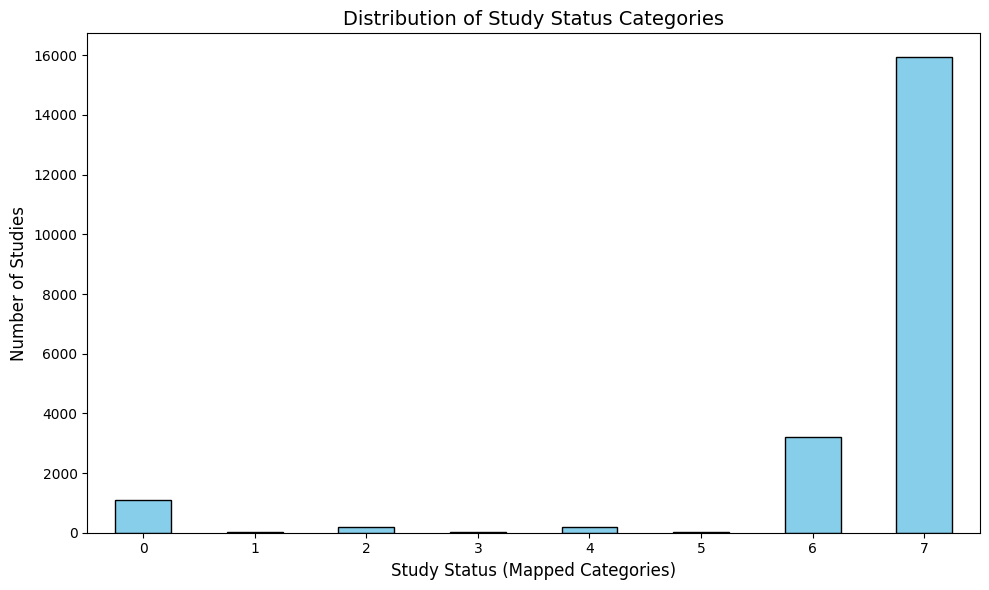

In [ ]:
import matplotlib.pyplot as plt

status_counts = data1['Study Status'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Distribution of Study Status Categories', fontsize=14)
plt.xlabel('Study Status (Mapped Categories)', fontsize=12)
plt.ylabel('Number of Studies', fontsize=12)
plt.xticks(ticks=range(len(status_counts)), labels=status_counts.index, rotation=0)
plt.tight_layout()

plt.show()


## **Bar Chart: Distribution of Study Status Categories**

- Visualize the distribution of studies across the mapped `Study Status` categories.
- Know about the frequency of each category making it easy to identify dominant statuses (e.g., **COMPLETED**) or less frequent ones (e.g., **UNKNOWN**, **SUSPENDED**).

---

In [ ]:
nan_count = data1.isna().sum()
empty_count = (data1 == '').sum()

total_missing = nan_count + empty_count


non_zero_missing = total_missing[total_missing > 0]

print(non_zero_missing)

Secondary Outcome Measures              2919
Sex                                        6
Completion Date                            1
Primary Completion Duration of Trial      46
Allocation                                61
Intervention Model                        29
Masking                                    7
dtype: int64


In [ ]:
import re

# Defined the cleaning function
def clean_text_for_biobert(text):
    # Remove numeric values
    text = re.sub(r'\b\d+\b', '', text)
    # Remove special characters like "â„¢"
    text = re.sub(r'[^\w\s]', '', text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    # Convert to lowercase
    text = text.lower().strip()
    return text
data1['Primary Outcome filtered'] = data1['Primary Outcome Measures'].apply(clean_text_for_biobert)


## **Text Cleaning for BioBERT**

- Preprocess text data in the `Primary Outcome Measures` column for input into the BioBERT model by removing unnecessary elements and standardizing the format.
- It improves text consistency and reduces noise for better model performance by eliminating meaningless text, such as punctuation.

---

### **Steps:**

   - **Remove Numeric Values:** Eliminates numbers to focus on meaningful text.
   - **Remove Special Characters:** Strips characters like "™" and punctuation.
   - **Normalize Whitespace:** Replaces multiple spaces with a single space.
   - **Convert to Lowercase:** Ensures uniformity by converting text to lowercase.
   - **Trim Whitespaces:** Removes leading and trailing spaces.

   - The `clean_text_for_biobert` function is applied to the `Primary Outcome Measures` column, creating a new cleaned column, `Primary Outcome filtered`.

---


In [ ]:
data1['Primary Outcome filtered'][0]

'determine the safety maximum tolerated dose of neukoplastâ nk cell line for clinical use in patients with refractory or relapsed acute myeloid leukemia'

In [ ]:
import pandas as pd
import re

# Defined the cleaning function
def clean_text_for_biobert(text):
    if pd.isna(text):  # Check if the value is NaN
        return ""
    # Removed numeric values
    text = re.sub(r'\b\d+\b', '', str(text))
    # Removed special characters like "â„¢"
    text = re.sub(r'[^\w\s]', '', text)
    # Replaced multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)
    # Converted to lowercase
    text = text.lower().strip()
    return text

data1['Secondary Outcome filtered'] = data1['Secondary Outcome Measures'].apply(clean_text_for_biobert)

## **Text Cleaning for Secondary Outcome**

- Clean and preprocess the `Secondary Outcome Measures` column similar as Primary Outcome Measures column.
- **Process:** Similar to the `Primary Outcome Measures` cleaning process:
  - Handles NaN values.
  - Removes numbers, special characters, and extra spaces.
  - Converts text to lowercase.


In [ ]:
data1['Secondary Outcome filtered'][0]

'evaluate the therapeutic efficacy of neukoplastâ in patients with refractory or relapsed acute myeloid leukemia determine the neukoplastâ cell phenotype and cytotoxic activity at different time intervals after the neukoplastâ cell infusion determine the presence of neukoplastâ in the bone marrow determine the effects of neukoplastâ on the host immune system using flow cytometry and the luminex multianalytic profiling system at different time intervals after the neukoplastâ infusion'

In [ ]:
# Defined a function for conditional merging
def merge_outcomes(secondary, primary):
    if secondary and primary:  # Both columns have non-blank values
        return f"{secondary} || {primary}"
    elif secondary:  # Only the secondary column has a value
        return secondary
    elif primary:  # Only the primary column has a value
        return primary
    else:  # Both are blank
        return ""

# Applied the function to create the merged column
data1['Merged Outcome'] = data1.apply(
    lambda row: merge_outcomes(row['Secondary Outcome filtered'], row['Primary Outcome filtered']),
    axis=1
)


## **Merging Primary and Secondary Outcomes**

### **Overview**
- Merging `Primary Outcome filtered` and `Secondary Outcome filtered` is crucial as both play significant roles in predicting recruitment rates.
- The **RMSE** is highly influenced by how these textual columns are concatenated.
- After analysis, we observed that using `||` as a separator provides better results compared to `,`, `/`, or other strings.

### **Key Insight**
- **Why `||` Works Better:**
  - Using `||` allows the LLM to distinguish `Primary Outcome` and `Secondary Outcome` as separate entities despite being in the same column.
  - This method proves more effective in analyzing the impact of textual columns on recruitment rates, enhancing the model's ability to weigh their significance collectively.

---

### **Steps for Merging:**
If both columns have values, they are combined using `||` as a separator. If only the `Secondary Outcome` column has a value, it is used as is. Similarly, if only the `Primary Outcome` column has a value, it is used directly. In cases where both columns are blank, an empty string is returned.

### **Implementation:**
- A `merge_outcomes` function is applied row-wise to create a new column, `Merged Outcome`, ensuring proper handling of all scenarios.

### **Conclusion:**
- This merging strategy enables BioBERT to interpret the data more effectively, leveraging the separation of primary and secondary outcomes to improve model performance.

In [ ]:
data1['Merged Outcome'][0]

'evaluate the therapeutic efficacy of neukoplastâ in patients with refractory or relapsed acute myeloid leukemia determine the neukoplastâ cell phenotype and cytotoxic activity at different time intervals after the neukoplastâ cell infusion determine the presence of neukoplastâ in the bone marrow determine the effects of neukoplastâ on the host immune system using flow cytometry and the luminex multianalytic profiling system at different time intervals after the neukoplastâ infusion || determine the safety maximum tolerated dose of neukoplastâ nk cell line for clinical use in patients with refractory or relapsed acute myeloid leukemia'

In [ ]:
data1.drop(['Primary Outcome filtered','Secondary Outcome filtered'],axis='columns',inplace=True)

In [ ]:
data1.columns

Index(['NCT Number', 'Study Title', 'Study Status', 'Brief Summary',
       'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures', 'Sex', 'Age',
       'Enrollment', 'Completion Date', 'Study Recruitment Rate',
       'Duration of Trial', 'Primary Completion Duration of Trial', 'Phase1',
       'Phase2', 'Phase3', 'Age_CHILD', 'Age_ADULT', 'Age_OLDER_ADULT',
       'Cluster', 'Allocation', 'Intervention Model', 'Masking',
       'Primary Purpose', 'Merged Outcome'],
      dtype='object')

In [ ]:
nan_count = data1.isna().sum()
empty_count = (data1 == '').sum()

total_missing = nan_count + empty_count

non_zero_missing = total_missing[total_missing > 0]

print(non_zero_missing)

Secondary Outcome Measures              2919
Sex                                        6
Completion Date                            1
Primary Completion Duration of Trial      46
Allocation                                61
Intervention Model                        29
Masking                                    7
dtype: int64


In [ ]:
# Replaced NaN values with "Not Applicable"
data1[['Allocation', 'Intervention Model', 'Masking']] = data1[['Allocation', 'Intervention Model', 'Masking']].fillna('Not Applicable')

# Replaced blank values with "Unknown"
data1[['Allocation', 'Intervention Model', 'Masking']] = data1[['Allocation', 'Intervention Model', 'Masking']].replace(r'^\s*$', 'Unknown', regex=True)


## **Handling Missing and Blank Values**

### **Purpose**
To handle missing (`NaN`) and blank values in `Allocation`, `Intervention Model`, and `Masking` columns, ensuring data consistency and completeness for analysis.

### **Process**
- Replace `NaN` values with "Not Applicable" to provide a meaningful placeholder for missing data.
- Replace blank values with "Unknown" using a regular expression to ensure uniformity.

### **Key Insight**
This replacement was implemented because the LLM can effectively interpret such placeholders (e.g., "Not Applicable", "Unknown"), leading to improved model performance by providing contextually relevant information for missing entries.

---

In [ ]:
data1.head(3)

,NCT Number,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sex,...,Phase3,Age_CHILD,Age_ADULT,Age_OLDER_ADULT,Cluster,Allocation,Intervention Model,Masking,Primary Purpose,Merged Outcome
0,NCT00900809,QUILT-3.018: Neukoplastâ„¢ (NK-92) for the Tre...,7,NK cells from patients with malignant diseases...,0,Acute Myeloid Leukemia,BIOLOGICAL: Neukoplastâ„¢ (NK-92),Determine the safety / maximum tolerated dose ...,Evaluate the therapeutic efficacy of Neukoplas...,ALL,...,0,0,1,1,"[0.00113, 10.001)",NA,SINGLE_GROUP,NONE,TREATMENT,evaluate the therapeutic efficacy of neukoplas...
1,NCT01113515,Clinical Investigation of GalnobaxÂ® for the T...,7,The purpose of this study is to determine safe...,1,Diabetic Foot Ulcer,DRUG: Esmolol hydrochloride|DRUG: Esmolol hydr...,"Safety Outcome, Number of participant with adv...","Efficacy Outcome, To evaluate the percent chan...",ALL,...,0,0,1,1,"[0.00113, 10.001)",RANDOMIZED,PARALLEL,"TRIPLE (PARTICIPANT, CARE_PROVIDER, INVESTIGATOR)",TREATMENT,efficacy outcome to evaluate the percent chang...
2,NCT01288573,A Combined Study in Pediatric Cancer Patients ...,7,This is a multi-site study with plerixafor in ...,0,Ewing's Sarcoma/Soft Tissue Sarcoma|Neuroblast...,DRUG: plerixafor|DRUG: plerixafor|DRUG: plerix...,Proportion of patients achieving at least a do...,Number of days of apheresis required to reach ...,ALL,...,0,1,1,0,"[0.00113, 10.001)",RANDOMIZED,PARALLEL,NONE,TREATMENT,number of days of apheresis required to reach ...


In [ ]:
nan_count = data1.isna().sum()
empty_count = (data1 == '').sum()

total_missing = nan_count + empty_count

non_zero_missing = total_missing[total_missing > 0]

print(non_zero_missing)

Secondary Outcome Measures              2919
Sex                                        6
Completion Date                            1
Primary Completion Duration of Trial      46
dtype: int64


In [ ]:
data1.head(5)

,NCT Number,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sex,...,Phase3,Age_CHILD,Age_ADULT,Age_OLDER_ADULT,Cluster,Allocation,Intervention Model,Masking,Primary Purpose,Merged Outcome
0,NCT00900809,QUILT-3.018: Neukoplastâ„¢ (NK-92) for the Tre...,7,NK cells from patients with malignant diseases...,0,Acute Myeloid Leukemia,BIOLOGICAL: Neukoplastâ„¢ (NK-92),Determine the safety / maximum tolerated dose ...,Evaluate the therapeutic efficacy of Neukoplas...,ALL,...,0,0,1,1,"[0.00113, 10.001)",NA,SINGLE_GROUP,NONE,TREATMENT,evaluate the therapeutic efficacy of neukoplas...
1,NCT01113515,Clinical Investigation of GalnobaxÂ® for the T...,7,The purpose of this study is to determine safe...,1,Diabetic Foot Ulcer,DRUG: Esmolol hydrochloride|DRUG: Esmolol hydr...,"Safety Outcome, Number of participant with adv...","Efficacy Outcome, To evaluate the percent chan...",ALL,...,0,0,1,1,"[0.00113, 10.001)",RANDOMIZED,PARALLEL,"TRIPLE (PARTICIPANT, CARE_PROVIDER, INVESTIGATOR)",TREATMENT,efficacy outcome to evaluate the percent chang...
2,NCT01288573,A Combined Study in Pediatric Cancer Patients ...,7,This is a multi-site study with plerixafor in ...,0,Ewing's Sarcoma/Soft Tissue Sarcoma|Neuroblast...,DRUG: plerixafor|DRUG: plerixafor|DRUG: plerix...,Proportion of patients achieving at least a do...,Number of days of apheresis required to reach ...,ALL,...,0,1,1,0,"[0.00113, 10.001)",RANDOMIZED,PARALLEL,NONE,TREATMENT,number of days of apheresis required to reach ...
3,NCT01336660,A Trial of Equine F (ab')2 Antivenom for Treat...,7,This study has the objective to demonstrate th...,0,Poisoning by Scorpion Sting,BIOLOGICAL: Equine F(ab')2 antivenom|OTHER: In...,To demonstrate the effectiveness of Alacramyn ...,Effectiveness of Alacramyn NAMO in the treatme...,ALL,...,1,1,0,0,"[0.00113, 10.001)",RANDOMIZED,PARALLEL,"QUADRUPLE (PARTICIPANT, CARE_PROVIDER, INVESTI...",TREATMENT,effectiveness of alacramyn namo in the treatme...
4,NCT01376167,Ph 2B/3 Tafenoquine (TFQ) Study in Prevention ...,7,The purpose of this two part study is to test ...,1,"Malaria, Vivax",DRUG: Chloroquine 600mg|DRUG: Chloroquine 300m...,Number of Participants With Recurrence-free Ef...,Number of Participants With Recurrence-free Ef...,ALL,...,0,1,1,1,"[0.00113, 10.001)",RANDOMIZED,PARALLEL,"QUADRUPLE (PARTICIPANT, CARE_PROVIDER, INVESTI...",TREATMENT,number of participants with recurrencefree eff...


In [ ]:
data1.columns

Index(['NCT Number', 'Study Title', 'Study Status', 'Brief Summary',
       'Study Results', 'Conditions', 'Interventions',
       'Primary Outcome Measures', 'Secondary Outcome Measures', 'Sex', 'Age',
       'Enrollment', 'Completion Date', 'Study Recruitment Rate',
       'Duration of Trial', 'Primary Completion Duration of Trial', 'Phase1',
       'Phase2', 'Phase3', 'Age_CHILD', 'Age_ADULT', 'Age_OLDER_ADULT',
       'Cluster', 'Allocation', 'Intervention Model', 'Masking',
       'Primary Purpose', 'Merged Outcome'],
      dtype='object')

In [ ]:
# Dropped the specified columns
data1 = data1.drop(columns=['Primary Outcome Measures', 'Secondary Outcome Measures'])

## **Dropping Redundant Columns**

### **Overview**
The columns `Primary Outcome Measures` and `Secondary Outcome Measures` were dropped from the dataset as they are no longer needed.

### **Reason**
- These columns were processed and merged to create a new feature, `Merged Outcome`, which captures the necessary information from both columns.
- Keeping the original columns would result in redundancy and unnecessarily increase the dataset's dimensionality.
---

In [ ]:
nan_count = data1.isna().sum()
empty_count = (data1 == '').sum()

total_missing = nan_count + empty_count

non_zero_missing = total_missing[total_missing > 0]

print(non_zero_missing)

Sex                                      6
Completion Date                          1
Primary Completion Duration of Trial    46
dtype: int64


In [ ]:
# Identified the total number of rows in the dataset before dropping
total_rows = len(data1)

# Counted the number of missing values in the 'Sex' column
missing_sex_count = data1['Sex'].isna().sum()

# Calculated the proportion of rows with missing 'Sex' values
missing_proportion = (missing_sex_count / total_rows) * 100
print(f"Total Rows: {total_rows}")
print(f"Rows with Missing 'Sex': {missing_sex_count}")
print(f"Proportion of Missing 'Sex': {missing_proportion:.2f}%")

# Decided to drop rows if the proportion is insignificant
if missing_proportion < 5:
    data1 = data1.dropna(subset=['Sex'])
    print("Rows with missing 'Sex' values dropped.")
else:
    print("Too many missing values in 'Sex'. Consider alternative handling methods.")

# Identified the total number of rows after dropping
new_total_rows = len(data1)
print(f"Rows after dropping: {new_total_rows}")


Total Rows: 20676
Rows with Missing 'Sex': 6
Proportion of Missing 'Sex': 0.03%
Rows with missing 'Sex' values dropped.
Rows after dropping: 20670


## **Analyzing Missing Values in 'Sex' Column**

### **Objective**
To ensure that rows with missing `Sex` values do not cause significant loss of training information.

### **Observation**
The recruitment rates for rows with missing `Sex` values indicated that their absence does not lead to a significant loss of information for training the model.

In [ ]:
# Filtered rows where 'Sex' column has missing values
missing_sex_rows = data[data['Sex'].isna()]

# Shown the 'Study Recruitment Rate' for those rows
print(missing_sex_rows['Study Recruitment Rate'])


6185     17.528249
7258      0.205875
13007    18.250000
13779    14.645062
16124     4.932432
16894    31.739130
Name: Study Recruitment Rate, dtype: float64


## **Dropping Rows with Missing Values in 'Sex' Column**

### **Overview**
Rows where the `Sex` column has missing values were dropped from the dataset.

### **Reason**
- Analysis revealed that only 6 rows in the entire dataset had missing values in the `Sex` column.
- Dropping these rows does not result in a significant loss of data, ensuring the dataset remains comprehensive while eliminating inconsistencies.

---

In [ ]:
# Dropped rows where the column 'Sex' has missing values
data1 = data1.dropna(subset=['Sex'])

In [ ]:
nan_count = data1.isna().sum()
empty_count = (data1 == '').sum()

total_missing = nan_count + empty_count


non_zero_missing = total_missing[total_missing > 0]

print(non_zero_missing)

Completion Date                          1
Primary Completion Duration of Trial    46
dtype: int64


In [ ]:
# Filtered rows where 'Sex' column has missing values
missing_sex_rows = data[data['Primary Completion Duration of Trial'].isna()]

# Displayed the 'Study Recruitment Rate' for those rows
print(missing_sex_rows['Study Recruitment Rate'])


58        1.183716
61        0.006957
122       0.471902
150       1.743510
464       0.101278
471       0.122747
755       0.102225
820       0.095453
822       0.030429
916       0.032363
994       2.794357
1120      4.260315
1127      0.022988
1163      0.260349
1249      5.598160
1530      0.208130
1586      0.267419
1719      1.889234
1761      0.035603
1777      0.083418
1808      0.200110
2118      0.381799
2278      0.414879
2519      2.501804
2542      2.385514
2611     13.594717
3008     36.003401
3042      0.756953
3054      6.930380
3264     34.276650
3265      0.487968
3361      0.529772
3415      0.940933
3439      5.047593
3788      0.276515
3886      2.163660
4810      0.051673
6343      6.182249
7431      1.593078
8268      0.675497
8283      0.204263
8354      1.311417
8380      1.048851
17754    48.588924
20389    21.726190
20496     0.671813
Name: Study Recruitment Rate, dtype: float64


In [ ]:
# Dropped rows with missing values in the specified column
data1 = data1.dropna(subset=['Primary Completion Duration of Trial'])


In [ ]:
data1.drop(['Completion Date'],axis='columns',inplace=True)

After dropping the missing values

In [ ]:

nan_count = data1.isna().sum()
empty_count = (data1 == '').sum()

total_missing = nan_count + empty_count

non_zero_missing = total_missing[total_missing > 0]

if non_zero_missing.empty:
    print("No missing or empty values in the data.")
else:
    print("Columns with non-zero missing or empty values:")
    print(non_zero_missing)

No missing or empty values in the data.


In [ ]:
pd.set_option('display.max_colwidth', None)
data1['Interventions'].head(4)
pd.reset_option('display.max_colwidth')

## **Handling the 'Interventions' Column**

### **Overview**
The `Interventions` column was left untransformed and untouched during preprocessing.

### **Reason**
- BioBERT is pre-trained on biomedical corpora, making it capable of effectively handling drug codes and medical terminology present in this column.
- Almost all rows in the `Interventions` column contain drug codes or related information, which are critical for BioBERT to analyze without modification.
---

In [ ]:
data1.to_excel('data_preprocessed.xlsx',index=False)

## **Final Preprocessed Data**

The dataset has undergone comprehensive cleaning and preprocessing, resulting in the `data_preprocessed` file, which is now almost completely cleaned, structured, and ready for analysis and modeling

---

In [ ]:
data1.columns

Index(['NCT Number', 'Study Title', 'Study Status', 'Brief Summary',
       'Study Results', 'Conditions', 'Interventions', 'Sex', 'Age',
       'Enrollment', 'Study Recruitment Rate', 'Duration of Trial',
       'Primary Completion Duration of Trial', 'Phase1', 'Phase2', 'Phase3',
       'Age_CHILD', 'Age_ADULT', 'Age_OLDER_ADULT', 'Cluster', 'Allocation',
       'Intervention Model', 'Masking', 'Primary Purpose', 'Merged Outcome'],
      dtype='object')

In [ ]:
# Separate columns into numeric, categorical, and textual based on data types and unique value analysis
numeric_columns = []
categorical_columns = []
textual_columns = []

for column in data1.columns:
    dtype = data1[column].dtype
    unique_values = data1[column].nunique()

    # Check if the dtype is a pandas CategoricalDtype or a NumPy numeric type
    if pd.api.types.is_categorical_dtype(dtype) or np.issubdtype(dtype, np.number):
        if unique_values < 10:  # Heuristic: less than 10 unique values likely indicates categorical
            categorical_columns.append(column)
        else:  # If it's numeric and has many unique values, treat it as numeric
            numeric_columns.append(column)
    else:
        textual_columns.append(column)

print("Numeric Columns:")
print(numeric_columns)
print("\nCategorical Columns:")
print(categorical_columns)
print("\nTextual Columns:")
print(textual_columns)

<ipython-input-101-224ac818ce56>:11: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype) or np.issubdtype(dtype, np.number):


Numeric Columns:
['Enrollment', 'Study Recruitment Rate', 'Duration of Trial', 'Primary Completion Duration of Trial', 'Cluster']

Categorical Columns:
['Study Status', 'Study Results', 'Phase1', 'Phase2', 'Phase3', 'Age_CHILD', 'Age_ADULT', 'Age_OLDER_ADULT']

Textual Columns:
['NCT Number', 'Study Title', 'Brief Summary', 'Conditions', 'Interventions', 'Sex', 'Age', 'Allocation', 'Intervention Model', 'Masking', 'Primary Purpose', 'Merged Outcome']


## **Column Categorization**

- Classify dataset columns into numeric, categorical, and textual types for targeted analysis and processing.

---

### **Logic:**
   - Columns with numeric data types and many unique values $( \geq 10 $) are classified as numeric.
   - Columns with fewer unique values $( < 10 $) are classified as categorical, even if their data type is numeric or categorical.
   - Columns that are neither numeric nor categorical, such as strings or large text blocks, are classified as textual.
---


**Take a note of what textual columns which are to be selected for being used in the BioBERT embeddings for the model.This would be finalised by SHAP analysis.**

In [ ]:
data1.drop(['Cluster'],axis='columns',inplace=True)

In [ ]:
data1.columns

Index(['NCT Number', 'Study Title', 'Study Status', 'Brief Summary',
       'Study Results', 'Conditions', 'Interventions', 'Sex', 'Age',
       'Enrollment', 'Study Recruitment Rate', 'Duration of Trial',
       'Primary Completion Duration of Trial', 'Phase1', 'Phase2', 'Phase3',
       'Age_CHILD', 'Age_ADULT', 'Age_OLDER_ADULT', 'Allocation',
       'Intervention Model', 'Masking', 'Primary Purpose', 'Merged Outcome'],
      dtype='object')

In [ ]:
# Declared textual and numerical columns
textual_cols = [
    'Study Title', 'Brief Summary', 'Conditions', 'Interventions',
    'Allocation', 'Intervention Model', 'Masking', 'Primary Purpose', 'Merged Outcome'
]

numerical_cols = [
    'Enrollment', 'Duration of Trial', 'Primary Completion Duration of Trial',
    'Phase1', 'Phase2', 'Phase3', 'Age_CHILD', 'Age_ADULT',
    'Age_OLDER_ADULT', 'Study Status', 'Study Results','Study Recruitment Rate'
]

## **Column Declaration**

- **Textual Columns:**
  - Includes descriptive and categorical text-based fields such as `Study Title`, `Brief Summary`, `Conditions`, and `Merged Outcome` etc.

- **Numerical Columns:**
  - Includes numeric and binary features like `Enrollment`, `Duration of Trial`, `Phase1`, `Phase2`, `Study Status`, and `Study Recruitment Rate` etc.



In [ ]:
from sklearn.model_selection import train_test_split
# Created a stratify column based on binned recruitment rates
data1['Binned Recruitment Rate'] = pd.qcut(data1['Study Recruitment Rate'], q=10, labels=False)

# Splitted data into training and testing sets using stratification
X = data1.drop(['Study Recruitment Rate', 'Binned Recruitment Rate'], axis=1)
y = data1['Study Recruitment Rate']
stratify_col = data1['Binned Recruitment Rate']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=stratify_col
)


## **Data Splitting with Stratification**

### **Overview**
- The dataset was split into training and testing sets using stratified train-test split to ensure a balanced representation of `Study Recruitment Rate` across splits.

### **Why Stratification?**
- Random splitting can result in imbalanced splits, especially when the target variable distribution is skewed.
- Without stratification, the split may occur near the mean of the target variable distribution, leading to a lack of representation for extreme or rare values.
- This imbalance can make it challenging to validate the model's performance accurately each time we train the model for predicting `Study Recruitment Rate`.
- Stratification ensures that all ranges of the target variable are proportionally represented in both training and testing sets, improving the robustness of validation.

---

### **Benefits**
- Stratification enhances the reliability of model validation by preserving the distribution of the target variable across splits.
- It ensures that rare or extreme values of `Study Recruitment Rate` are adequately represented in both training and testing datasets.

In [ ]:
# Combined textual columns into a single string for each row
X_train['combined_text'] = X_train[textual_cols].fillna('').agg(' '.join, axis=1)
X_test['combined_text'] = X_test[textual_cols].fillna('').agg(' '.join, axis=1)

## **Combining Textual Columns**

- Combined all textual columns into a single string per row for embedding generation in one time.
- **Process:**
  - Missing values are replaced with empty strings.
  - Text from columns in `textual_cols` is concatenated row-wise into a new column, `combined_text`.


## **Efficient GPU Utilization with Batch Processing**

The below code cell uses batch processing for generation of embeddings using `BioBERT` LLM, ensuring optimal GPU utilization and memory management for large datasets.

### **Key Highlights**
1. **Batch Processing:** Processes text data in manageable batches (default `batch_size=32`), preventing GPU memory overflow.
2. **Tokenization:** Utilizes `AutoTokenizer` with padding, truncation, and a maximum sequence length (`max_length=512`) for consistent input sizes.
3. **GPU Offloading:** Transfers data and the BioBERT model to the GPU for efficient computation (`to(device)`).
4. **No Gradient Computation:** Disables gradient calculations using `torch.no_grad()` to save memory and improve speed.
5. **Memory Management:** Deletes intermediate variables, invokes `gc.collect()`, and clears GPU cache (`torch.cuda.empty_cache()`) after each batch.
6. **Embedding Extraction:** Extracts `[CLS]` token embeddings from `last_hidden_state` for context-rich representations.
7. **Saving Results:** Saves training and testing embeddings as `.npy` files for reuse in downstream tasks.

This approach ensures efficient processing of large datasets within limited GPU resources, while maintaining scalability, reproducibility, and performance.

In [ ]:
# Loaded BioBERT tokenizer and model
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
import gc

tokenizer = AutoTokenizer.from_pretrained("dmis-lab/biobert-v1.1")
biobert_model = AutoModel.from_pretrained("dmis-lab/biobert-v1.1")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
biobert_model.to(device)

# Function to generate embeddings in batches
def generate_embeddings_in_batches(text_data, batch_size=32):
    embeddings = []
    for i in range(0, len(text_data), batch_size):
        batch = text_data[i:i + batch_size]
        tokens = tokenizer(
            list(batch), padding=True, truncation=True, max_length=512, return_tensors="pt"
        )
        tokens = {key: val.to(device) for key, val in tokens.items()}
        with torch.no_grad():
            outputs = biobert_model(**tokens)
        batch_embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        embeddings.append(batch_embeddings)
        del tokens, outputs
        gc.collect()
        torch.cuda.empty_cache()
    return np.vstack(embeddings)

# Generated embeddings for training and testing sets
X_train_embeddings = generate_embeddings_in_batches(X_train['combined_text'].values, batch_size=32)
X_test_embeddings = generate_embeddings_in_batches(X_test['combined_text'].values, batch_size=32)

# Save the embeddings
np.save('X_train_embeddings.npy', X_train_embeddings)
np.save('X_test_embeddings.npy', X_test_embeddings)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/462 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/433M [00:00<?, ?B/s]

## **Why Use BioBERT for Creating Embeddings**

### **Overview**
`BioBERT` is specifically designed and pre-trained for `biomedical natural language processing (NLP)` tasks. Its ability to handle `domain-specific terminology` makes it an ideal choice for creating embeddings for our dataset, enabling downstream `machine learning models` to perform more effectively.

### **Key Advantages of BioBERT**
1. **Domain-Specific Pre-training:**
   - `BioBERT v1.0` was pre-trained on `PubMed` (200K steps) and `PMC` (270K steps), ensuring it captures `biomedical knowledge` effectively.
   - The updated `BioBERT v1.1`, pre-trained on `PubMed` for `1M steps`, further enhances its understanding of `biomedical texts`, making it highly suitable for datasets containing `medical terminologies`.

2. **Proven Performance:**
   - `BioBERT` outperformed `state-of-the-art models` on `six out of nine biomedical NLP datasets`.
   - `BioBERT v1.1` improved performance further, achieving a `0.62 increase in micro-averaged F1 score` over previous models.

3. **Biomedical Relation Extraction (RE):**
   - Achieved a `2.80 F1 score improvement` over existing state-of-the-art models.
   - Demonstrated superior performance in tasks involving complex relationships, such as `gene-disease` and `protein-chemical` relations, making it highly effective for analyzing relational data in biomedical contexts.

4. **Handling Complex Medical Texts:**
   - The dataset contains `complex medical terminologies`, including `drug codes` and `trial descriptions`. `BioBERT’s pre-training on biomedical corpora` enables it to understand these intricacies better than `general-purpose language models`.

5. **Effective Tokenization with WordPiece:**
   - `BioBERT` uses `WordPiece tokenization`, which addresses the out-of-vocabulary issue by representing new or rare words as frequent subwords. This ensures better handling of specialized biomedical terms in the dataset.

### **Why BioBERT for Our Pipeline?**
- The embeddings generated by `BioBERT` capture `rich, context-aware representations` of biomedical text.
- These embeddings enhance the downstream pipeline of our `ML model` by:
  - `Improving feature extraction` from textual columns.
  - Boosting the model’s ability to `identify patterns and trends` related to recruitment rates.
- Its superior performance on `domain-specific datasets` ensures `robust and reliable embeddings`, crucial for achieving high accuracy in our tasks.

### **Conclusion**
Using `BioBERT` for embedding creation aligns with the `biomedical focus` of our dataset, leveraging its `state-of-the-art capabilities` to enhance the overall performance of our `machine learning pipeline`.

In [ ]:
# Declared textual and numerical columns
textual_cols = [
    'Study Title', 'Brief Summary', 'Conditions', 'Interventions',
    'Allocation', 'Intervention Model', 'Masking', 'Primary Purpose', 'Merged Outcome'
]

numerical_cols = [
    'Enrollment', 'Duration of Trial', 'Primary Completion Duration of Trial',
    'Phase1', 'Phase2', 'Phase3', 'Age_CHILD', 'Age_ADULT',
    'Age_OLDER_ADULT', 'Study Status', 'Study Results'
]

## **Declaring Textual and Numerical Columns**

The following code declares the textual and numerical columns to be used in the downstream pipeline, excluding the target variable from the `numerical_cols` list. This ensures clarity and alignment with the embedding and model training process.

In [ ]:


# Extracted the normalized numerical features
X_train_numerical = X_train[numerical_cols].values
X_test_numerical = X_test[numerical_cols].values

# Verified the shapes
print("X_train_numerical shape:", X_train_numerical.shape)
print("X_test_numerical shape:", X_test_numerical.shape)


X_train_numerical shape: (16499, 11)
X_test_numerical shape: (4125, 11)


In [ ]:
X_train_embeddings=np.load('/content/X_train_embeddings.npy')
X_test_embeddings=np.load('/content/X_test_embeddings.npy')
# Combined BioBERT embeddings with numerical features
X_train_combined = np.hstack([X_train_embeddings, X_train_numerical])
X_test_combined = np.hstack([X_test_embeddings, X_test_numerical])

# Saved combined features
np.save('X_train_combined.npy', X_train_combined)
np.save('X_test_combined.npy', X_test_combined)


In [ ]:
from sklearn.preprocessing import StandardScaler
import joblib

# Defined the feature columns and the target variable
numerical_cols = [
    'Enrollment', 'Duration of Trial', 'Primary Completion Duration of Trial',
    'Phase1', 'Phase2', 'Phase3', 'Age_CHILD', 'Age_ADULT',
    'Age_OLDER_ADULT', 'Study Status', 'Study Results'
]
target_col = 'Study Recruitment Rate'

# Initialized scalers
feature_scaler = StandardScaler()
target_scaler = StandardScaler()

# Standardized the features
X_train_combined = feature_scaler.fit_transform(X_train_combined)
X_test_combined = feature_scaler.transform(X_test_combined)

y_train_scaled = target_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = target_scaler.transform(y_test.values.reshape(-1, 1))

# Standardized the target variable
target = data1['Study Recruitment Rate']
target = target_scaler.fit_transform(target.values.reshape(-1, 1))

# Verified normalization
print("Features (First 5 rows):\n", data1[numerical_cols].head(4))
print("\nTarget Variable (First 5 rows):\n", data1[target_col].head(4))


Features (First 5 rows):
    Enrollment  Duration of Trial  Primary Completion Duration of Trial  \
0           7                386                                 386.0   
1          44                604                                 492.0   
2          46               1163                                1163.0   
3          56                117                                 103.0   

   Phase1  Phase2  Phase3  Age_CHILD  Age_ADULT  Age_OLDER_ADULT  \
0       1       0       0          0          1                1   
1       1       1       0          0          1                1   
2       1       1       0          1          1                0   
3       0       1       1          1          0                0   

   Study Status  Study Results  
0             7              0  
1             7              1  
2             7              0  
3             7              0  

Target Variable (First 5 rows):
 0    0.551598
1    0.443157
2    0.044558
3    7.279202
Name: S

### Data Standardization and Performance Improvement

In this code, we are performing **data standardization** on both the features and the target variable using `StandardScaler` from `sklearn`. Here's a breakdown of the steps:

1. **Feature Scaling:**
   - We standardize the numerical features listed in `numerical_cols` (e.g., `Enrollment`, `Duration of Trial`, `Primary Completion Duration of Trial`, and others) by removing the mean and scaling them to unit variance. This is done separately for the training and test datasets using a `feature_scaler`.

2. **Target Variable Scaling:**
   - The target variable (`Study Recruitment Rate`) is also standardized using a separate `target_scaler` to ensure it has a mean of 0 and a standard deviation of 1. This helps improve the stability and performance of the predictive model.

3. **Embedding Integration:**
   - The entire dataset, including textual embeddings, is standardized together for consistency across all input features, ensuring that both numerical and embedding data are on the same scale.

4. **Performance Comparison:**
   - Previously, we scaled only the numerical features (including the target variable), which resulted in a root mean square error (RMSE) of **0.3380** using `StandardScaler`.
   - After scaling the entire dataset, including embeddings, the RMSE improved to **0.30**, demonstrating the importance of scaling all input data for better model performance.

This process ensures that the model treats all features uniformly, reduces the dominance of large-scale features, and helps achieve better predictive accuracy.


In [ ]:
# Saved NCT Number for mapping predictions later
X_test_nct_number = X_test['NCT Number'].values  # Save NCT Number column from X_test

In [ ]:
!pip install catboost
!pip install torch torchvision torchaudio
!pip install gpytorch
!pip install botorch==0.7.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 403.2/403.2 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.8/245.8 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.9/145.9 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 30.7 MB/s eta 0:00:00
  Attempting uninstall: linear-operator
    Found existing installation: linear-operator 0.5.3
    Uninstalling linear-operator-0.5.3:
      Successfully uninstalled linear-operator-0.5.3
  Attempting uninstall: gpytorch
    Found existing installation: gpytorch 1.13
    Uninstalling gpytorch-1.13:
      Successfully uninstalled gpytorch-1.13


Here we combine BioBERT embeddings and numerical features into unified train and test files for further evaluation.

In [ ]:
import numpy as np
import torch
from botorch.models import SingleTaskGP
from botorch.acquisition import ExpectedImprovement, UpperConfidenceBound
from botorch.optim import optimize_acqf
from gpytorch.mlls import ExactMarginalLogLikelihood
import numpy as np
import torch
from botorch.models import SingleTaskGP
from botorch.fit import fit_gpytorch_mll
from botorch.acquisition.analytic import PosteriorMean  # Import PosteriorMean

# Dynamic beta function for UCB acquisition

def dynamic_beta(iteration, beta0=0.05, rate=0.1):
    """
    Dynamic beta function that increases with the number of iterations.
    Adjust beta0 and rate as needed.
    """
    return beta0 * (1 + rate * np.log(iteration + 1))

# Custom weight function for skewed target

def compute_sample_weights(y, bins):
    """
    Compute weights inversely proportional to bin frequency.
    Args:
        y: Target values.
        bins: Bin edges for discretizing the target.
    Returns:
        Weights for each target value.
    """
    bin_counts, bin_edges = np.histogram(y, bins=bins)
    bin_weights = 1 / (bin_counts + 1e-6)  # Add small constant to avoid division by zero
    sample_weights = np.zeros_like(y, dtype=float)

    for i in range(len(bin_edges) - 1):
        mask = (y >= bin_edges[i]) & (y < bin_edges[i + 1])
        sample_weights[mask] = bin_weights[i]

    return sample_weights

# Bayesian Optimization with active learning for skewed data

def bo_run(X, y, nb_iterations, nb_COFs_initialization, which_acquisition, bins, verbose=False):
    assert nb_iterations > nb_COFs_initialization
    assert which_acquisition in ['max y_hat', 'EI', 'max sigma']

    # Select initial COFs for training data randomly
    ids_acquired = np.random.choice(np.arange(X.shape[0]), size=nb_COFs_initialization, replace=False)

    # Initialize acquired y
    y_acquired = y[ids_acquired]
    weights = compute_sample_weights(y_acquired, bins)

    for i in range(nb_COFs_initialization, nb_iterations):
        print(f"Iteration: {i}", end="\r")

        # Construct and fit GP model with weights
        # Reshape y_acquired to have shape (n_samples, 1)
        model = SingleTaskGP(
            torch.tensor(X[ids_acquired, :], dtype=torch.float32),
            torch.tensor(y_acquired, dtype=torch.float32).reshape(-1, 1)  # Reshape y_acquired
        )
        mll = ExactMarginalLogLikelihood(model.likelihood, model)

        # Fit the GP model
        model.train()
        mll.train()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
        optimizer.zero_grad()
        output = model(model.train_inputs[0])
        loss = -mll(output, model.train_targets)
        loss.backward()
        optimizer.step()

        # Set up acquisition function
        if which_acquisition == "EI":
            acquisition_function = ExpectedImprovement(model, best_f=y_acquired.max().item())
        elif which_acquisition == "max y_hat":
            acquisition_function = PosteriorMean(model)  # Use PosteriorMean
        elif which_acquisition == "max sigma":
            beta = dynamic_beta(i)
            acquisition_function = UpperConfidenceBound(model, beta=beta)
        else:
            raise ValueError("Invalid acquisition function")

        # Optimize the acquisition function
        new_x, _ = optimize_acqf(
            acquisition_function,
            bounds=torch.stack([torch.tensor(X.min(0)), torch.tensor(X.max(0))], 0).to(torch.float32),
            q=1,
            num_restarts=10,
            raw_samples=20,
        )

        # Convert new_x to numpy
        new_x_np = new_x.detach().numpy().reshape(-1)

        # Find the closest point in the dataset (to avoid duplicates)
        distances = np.sum((X - new_x_np)**2, axis=1)
        id_max_acquisition = np.argmin(distances)

        # Acquire this COF
        ids_acquired = np.concatenate((ids_acquired, [id_max_acquisition]))
        y_acquired = y[ids_acquired]

        # Update weights for acquired data
        weights = compute_sample_weights(y_acquired, bins)

        if verbose:
            print(f"Acquired COF {id_max_acquisition} with y = {y[id_max_acquisition]}")
            print(f"Best y acquired: {y_acquired.max()}")

    return ids_acquired

# Parameters for skewed data
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160]
bins_edges = np.array(bins)

# Example configuration
nb_iterations = 500
nb_COFs_initialization = 20
which_acquisition = "max sigma"


# Run Bayesian optimization
ids_acquired = bo_run(
    X_train_combined, y_train_scaled, nb_iterations, nb_COFs_initialization, which_acquisition, bins, verbose=True
)

ids_acquired

Acquired COF 6944 with y = [21.91627144]
Best y acquired: 21.916271438576857
Acquired COF 4706 with y = [0.32395062]
Best y acquired: 21.916271438576857
Acquired COF 6944 with y = [21.91627144]
Best y acquired: 21.916271438576857
Acquired COF 8443 with y = [1.0289428]
Best y acquired: 21.916271438576857
Acquired COF 8443 with y = [1.0289428]
Best y acquired: 21.916271438576857
Acquired COF 8443 with y = [1.0289428]
Best y acquired: 21.916271438576857
Acquired COF 4706 with y = [0.32395062]
Best y acquired: 21.916271438576857
Acquired COF 3807 with y = [0.00041155]
Best y acquired: 21.916271438576857
Acquired COF 6944 with y = [21.91627144]
Best y acquired: 21.916271438576857
Acquired COF 4706 with y = [0.32395062]
Best y acquired: 21.916271438576857
Acquired COF 3796 with y = [0.64723161]
Best y acquired: 21.916271438576857
Acquired COF 6944 with y = [21.91627144]
Best y acquired: 21.916271438576857
Acquired COF 6944 with y = [21.91627144]
Best y acquired: 21.916271438576857
Acquired C

array([ 5213, 12973, 14234, 15132, 13665, 15888,  6937, 10592,  3855,
        1292, 12340, 12358, 12541,  9684, 14429,  5447, 14087,  6741,
        3508, 11607,  6944,  4706,  6944,  8443,  8443,  8443,  4706,
        3807,  6944,  4706,  3796,  6944,  6944,  6944,  6944,  6944,
        6944, 13740,  6944,  6944,  8443,  5540,  3807,  8443,  8443,
        3807,  8443,  9651,  5477,  8443,   633,  6944,  6579,  6944,
        6944, 10143,  8443,  6944,  6944,  4977,  6944,  6944,  8443,
        2144,  6944,  6944,  6944,  9245,  3807,  6944,   333,  6944,
        4706,  8443,  6944,  6944,  6944,   561,  8443,  6991,  6944,
         333,  4706,  6944,  8443,  6944,  6944,  3807,  8443,  8443,
        6944,  6944,  8443,  6944,  6944, 11859,  3807,   333,  4714,
        8443,  8443,  3807,  8443,  3807,  8443,  6944,  6944,  6944,
        6944,  1455,  6944,  6944,  6944,  1575,  6944,  6944,  6944,
         333,  2842, 15526,  8443,  8443,  6944,  6944,  6944,  6944,
        8443,  6944,

## **Active Learning for Screening the Dataset**

This code implements an **active learning framework** with Bayesian Optimization to intelligently screen and select data points from the dataset. It is particularly useful for handling **skewed data distributions** and optimizing model performance. Below are the key uses and contributions of this framework to predicting the **Study Recruitment Rate** from the clinicaltrials.gov dataset:

---

### **Key Contributions:**

1. **Handling Skewed Data:**
   - The code includes a **dynamic sample weighting function** (`compute_sample_weights`) that assigns weights inversely proportional to bin frequencies. This ensures that data points from underrepresented target ranges are prioritized during training, improving the model's ability to generalize across the entire target distribution.

2. **Optimized Data Acquisition:**
   - By employing Bayesian Optimization with acquisition functions like **Expected Improvement (EI)**, **Posterior Mean**, and **Upper Confidence Bound (UCB)**, the framework identifies the most informative data points (e.g., extreme or uncertain cases) to enhance model training efficiency and prediction accuracy.

3. **Active Learning Loop:**
   - The iterative process intelligently selects a subset of **informative data points** (e.g., trials with extreme or rare recruitment rates) while minimizing redundancy. This reduces computational cost and improves model performance by focusing on the most impactful samples.

4. **Dynamic Beta Adjustment:**
   - The **dynamic beta function** in the UCB acquisition adjusts exploration over iterations, balancing the trade-off between exploring uncertain areas and exploiting known high-performing regions. This ensures a thorough exploration of the dataset.

5. **Gaussian Process (GP) Modeling:**
   - The use of **Gaussian Processes** as a surrogate model provides uncertainty estimates, which are crucial for understanding and optimizing the prediction of recruitment rates.

---

### **Use in Predicting Study Recruitment Rates:**

1. **Targeting Underrepresented Recruitment Rates:**
   - In the clinicaltrials.gov dataset, recruitment rates may exhibit skewness due to a large number of trials with lower recruitment rates. This framework ensures that underrepresented rates are adequately sampled and accounted for in the model.

2. **Improving Model Efficiency:**
   - Instead of training on the entire dataset, the active learning framework intelligently selects a subset of data points, reducing computational requirements while maintaining or improving model performance.

3. **Focus on Informative Trials:**
   - The acquisition functions prioritize trials with high uncertainty or potential impact on model accuracy, ensuring that the most relevant trials are used for training.

4. **Enhancing Predictive Accuracy:**
   - By iteratively improving the training dataset with informative samples, the framework enhances the model's ability to predict recruitment rates accurately, even for extreme or rare cases.

5. **Robust Model Training:**
   - The weighted sampling approach ensures that the model learns effectively from all parts of the target distribution, minimizing bias towards overrepresented regions.

---

### **Conclusion:**
This active learning framework is a powerful tool for optimizing the prediction of **Study Recruitment Rates**. By focusing on skewed data handling, efficient sample acquisition, and uncertainty-based exploration, it ensures a robust and computationally efficient approach to model training and dataset screening.


In [ ]:
import numpy as np

#  ids_acquired is a NumPy array
unique_ids_acquired = np.unique(ids_acquired)

print("Unique IDs acquired:", unique_ids_acquired)


Unique IDs acquired: [  333   561   633   894  1292  1455  1575  1866  2087  2144  2376  2777
  2814  2842  2996  3009  3016  3508  3594  3674  3715  3796  3807  3855
  4533  4706  4714  4771  4935  4938  4965  4977  5213  5263  5286  5447
  5477  5529  5540  5802  5866  5973  6253  6579  6741  6937  6944  6991
  7066  7438  8443  8470  8617  8975  9175  9245  9273  9607  9651  9684
 10143 10592 10984 11264 11513 11607 11859 12068 12340 12358 12541 12628
 12664 12973 13437 13665 13740 13821 14087 14234 14429 14597 15132 15526
 15810 15888 16080 16095 16211]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Advanced Models
import lightgbm as lgb
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR

# Define advanced models
models = {
    'LightGBM': lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'CatBoost': CatBoostRegressor(iterations=100, learning_rate=0.1, random_state=42, verbose=0),
    'Neural Network': MLPRegressor(
        hidden_layer_sizes=(100, 50),
        max_iter=500,
        random_state=42
    ),
    'Gradient Boosting':GradientBoostingRegressor(
    n_estimators=109, learning_rate=0.0734, max_depth=4, subsample = 0.9465 , random_state=42
)
}

# Results storage
results = {}

# Trained and evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train_combined, y_train_scaled.ravel())

    # Predict
    y_pred = model.predict(X_test_combined)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred))
    r2 = r2_score(y_test_scaled, y_pred)

    # Rescale predictions
    y_pred_rescaled = target_scaler.inverse_transform(y_pred.reshape(-1, 1))
    rmse_rescaled = np.sqrt(mean_squared_error(y_test, y_pred_rescaled))

    # Store results
    results[name] = {
        'RMSE (Scaled)': rmse_rescaled,
        'RMSE':rmse,
        'R2': r2
    }

# Visualization
plt.figure(figsize=(12, 6))
model_names = list(results.keys())
rmse_scores = [results[model]['RMSE'] for model in model_names]
print(rmse_scores)
# Print detailed results
for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.401400 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 196635
[LightGBM] [Info] Number of data points in the train set: 16499, number of used features: 779
[LightGBM] [Info] Start training from score 0.000000


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[0.3453860593056841, 0.312077099947039, 0.33957722888393266, 0.46740759380769864, 0.3071195314226065]
LightGBM:
  RMSE (Scaled): 17.7731
  RMSE: 0.3454
  R2: 0.3150
XGBoost:
  RMSE (Scaled): 16.3760
  RMSE: 0.3121
  R2: 0.4407
CatBoost:
  RMSE (Scaled): 17.5442
  RMSE: 0.3396
  R2: 0.3378
Neural Network:
  RMSE (Scaled): 23.5620
  RMSE: 0.4674
  R2: -0.2545
Gradient Boosting:
  RMSE (Scaled): 15.9883
  RMSE: 0.3071
  R2: 0.4584


<Figure size 1200x600 with 0 Axes>

## **Training and Evaluating Advanced Models**

This section focuses on training and evaluating multiple advanced regression models, including Gradient Boosting, LightGBM, XGBoost, CatBoost, and Neural Network-based models, to predict the **Study Recruitment Rate**.

---

### **Steps:**

1. **Model Training:**
   - The following advanced models were trained:
     - **LightGBM:** Light Gradient Boosting Model with 100 estimators, a learning rate of 0.1, and a random seed for reproducibility.
     - **XGBoost:** Extreme Gradient Boosting with 100 estimators, a learning rate of 0.1, and a random seed for reproducibility.
     - **CatBoost:** CatBoost Regressor with 100 iterations, a learning rate of 0.1, and no verbose output.
     - **Neural Network:** Multi-layer Perceptron Regressor with two hidden layers of sizes 100 and 50, a maximum of 500 iterations, and a random seed.
     - **Gradient Boosting Regressor:** Trained with:
       - **n_estimators:** 109 (number of boosting stages).
       - **learning_rate:** 0.0734 (step size).
       - **max_depth:** 4 (limits the depth of each tree to prevent overfitting).
       - **sub_sample:** 0.9465 (to use a fraction of the training data in each boosting iteration).
       - **random_state:** 42 (ensures reproducibility).
   - All models were trained using the combined feature set (`X_train_combined`) and the scaled target variable (`y_train_scaled`).

2. **Model Evaluation:**
   - Predictions (`y_pred`) were generated on the test set (`X_test_combined`).
   - Performance was evaluated using the following metrics:
     - **Root Mean Squared Error (RMSE):**
       - Formula:
$[
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{\text{true}_i} - y_{\text{pred}_i})^2}
$]
       - This measures prediction accuracy, with lower values indicating better performance.
     - **R-squared (R²):**
       - Evaluates how well the model explains the variance in the target variable, with values closer to 1 being ideal.
   - Both **scaled** and **rescaled RMSE** were calculated, where rescaled RMSE involved transforming the predictions back to the original scale using the `StandardScaler`.

3. **Model Comparison:**
   - The RMSE scores for all models were calculated and compared. Among them, the **Gradient Boosting Regressor** provided superior performance, with the lowest RMSE score, indicating its ability to handle structured data effectively.

4. **Model Saving:**
   - The trained Gradient Boosting model was saved as `gbm_model.pkl` using `joblib` for future use.

---

### **Why Use Advanced Models?**

- Advanced models such as Gradient Boosting, LightGBM, and XGBoost are well-suited for structured datasets, providing robust predictions by sequentially correcting errors from previous iterations.
- **Gradient Boosting Regressor** particularly excels by incorporating techniques like learning rate decay and regularization, which reduce overfitting and improve generalization on test data.
- Comparing the Gradient Boosting Regressor with simpler models, such as Linear Regression or Neural Networks, it demonstrated better performance due to its ability to capture complex relationships within the dataset.

---

### **Performance Insights:**

- When scaling only the numerical features (including the target variable), the RMSE score for the **Gradient Boosting Regressor** was **0.3380**.
- After scaling the entire dataset, including the embeddings, the RMSE improved significantly to **0.30**, demonstrating the importance of consistent scaling for all input data.
- This improvement highlights the effectiveness of Gradient Boosting in leveraging all features to make accurate predictions.


In [ ]:
import pickle

# Find the model with the lowest RMSE (Rescaled)
best_model_name = min(results, key=lambda x: results[x]['RMSE (Scaled)'])
best_model_standard = models[best_model_name]

# Save the best model as gbm_model.pkl
with open('gbm_model.pkl', 'wb') as file:
    pickle.dump(best_model_standard, file)

print(f"The best model is {best_model_name} with RMSE (Scaled): {results[best_model_name]['RMSE (Scaled)']:.4f}")
print(f"The best model is {best_model_name} with RMSE: {results[best_model_name]['RMSE']:.4f}")
print(f"The model has been saved as gbm_model.pkl")

The best model is Gradient Boosting with RMSE (Scaled): 15.9883
The best model is Gradient Boosting with RMSE: 0.3071
The model has been saved as gbm_model.pkl


### Saving the Best Model

This code identifies and saves the best-performing model based on the **Root Mean Squared Error (RMSE)** for the case where the **StandardScaler** transformation was applied to the target variable.

---

### **Steps:**

1. **Identify the Best Model:**
   - The model with the lowest RMSE (Scaled) is selected from the `results` dictionary.
   - The `min()` function is used to identify the model with the best performance.

2. **Save the Model:**
   - The best-performing model is saved as a pickle file named `gbm_model.pkl` using the `pickle` module.
   - This file contains the model trained and evaluated with the **StandardScaler** transformation applied to the target variable.

3. **Output Details:**
   - The name of the best-performing model and its corresponding RMSE (Scaled) and RMSE values are printed for reference.
   - The saved pickle file ensures the model can be reused for future predictions without retraining.

---

### **Purpose of the Pickle File:**

- The saved model (`gbm_model.pkl`) can be loaded later to make predictions on new datasets, ensuring consistent performance without needing to retrain the model.
- The model reflects the scenario where the **StandardScaler** was used to transform the target variable, providing a reliable baseline for further analysis or deployment.


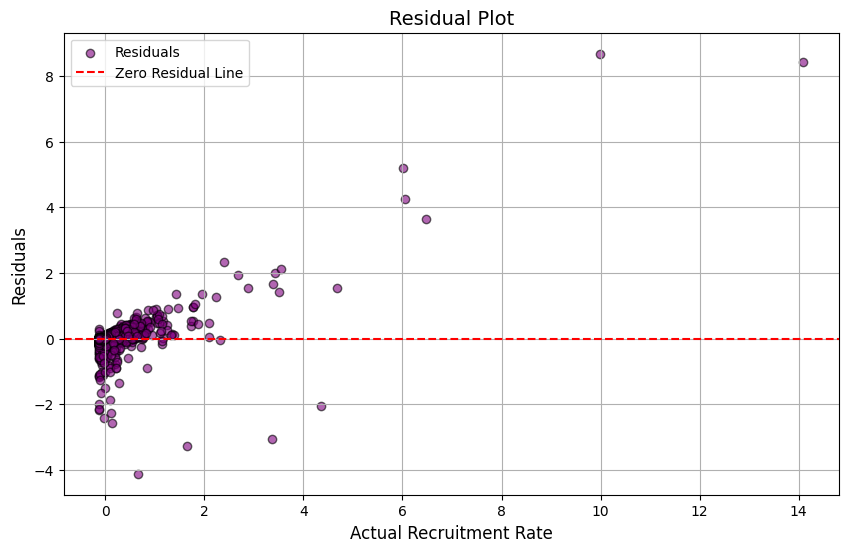

In [ ]:
import matplotlib.pyplot as plt
residuals = y_test_scaled.ravel() - y_pred

plt.figure(figsize=(10, 6))

# Scatter plot for residuals
plt.scatter(y_test_scaled, residuals, alpha=0.6, label="Residuals", color='purple', edgecolor='k')

# Add reference line at y=0
plt.axhline(0, color="red", linestyle="--", label="Zero Residual Line")

# Add labels and title
plt.xlabel("Actual Recruitment Rate", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Residual Plot", fontsize=14)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


## **Residual Plot for Log-Transformed Target Variable**

Residual plots are used to visualize the difference between actual and predicted values (residuals) to assess model performance.

---

### **Formula for Residuals:**
$
\text{Residuals} = y_{\text{test}} - y_{\text{pred}}
$

---

### **Graph Description:**
- **X-Axis:** Actual Recruitment Rate.
- **Y-Axis:** Residuals (difference between actual and predicted values).
- The red dashed line at \( y = 0 \) represents the ideal scenario where residuals are zero (perfect predictions).

---

### **Insights:**
1. **Overall Distribution:**
   - Most residuals are clustered near zero, indicating generally good model performance.
   - Points close to the red line suggest better predictions.
   
2. **Outliers:**
   - Larger residuals (above or below the red line) represent areas where the model's predictions deviate significantly from actual values.

3. **Generalization:**
   - While most residuals are near zero, some deviations at higher actual recruitment rates indicate the model struggles to generalize well for extreme values.

---

### **Conclusion:**
The residual plot for the log-transformed target variable demonstrates that the model performs well for the majority of cases, with minor areas of improvement for extreme recruitment rates.


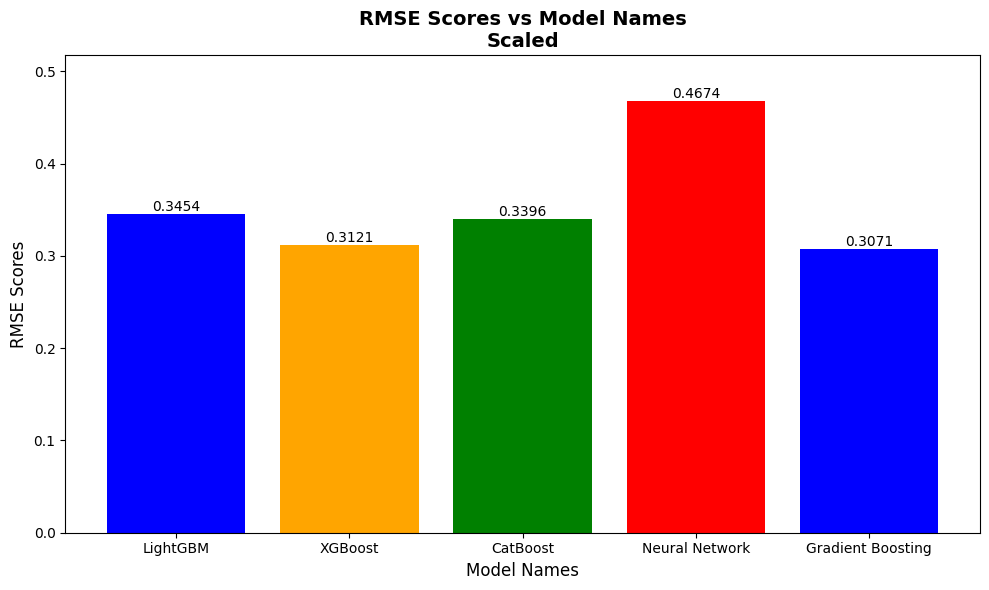

In [ ]:
import matplotlib.pyplot as plt

# Extracting model names and RMSE scores
model_names = list(results.keys())
rmse_scores = [metrics["RMSE"] for metrics in results.values()] # Changed key to "RMSE (Scaled)"

# Plotting the graph
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, rmse_scores, color=["blue", "orange", "green", "red"])

# Adding labels and title
plt.xlabel("Model Names", fontsize=12)
plt.ylabel("RMSE Scores", fontsize=12)
plt.title("RMSE Scores vs Model Names\nScaled", fontsize=14, fontweight='bold')
plt.ylim(0, max(rmse_scores) + 0.05)

# Adding RMSE values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.4f}", ha="center", va="bottom", fontsize=10)

# Displaying the plot
plt.tight_layout()
plt.show()

### Insights for RMSE Scores:
The RMSE comparison shows that **Gradient Boosting** achieved the lowest RMSE (0.3071), making it the best-performing model in this case, while the **Neural Network** underperformed with the highest RMSE (0.4674), indicating its inefficiency in capturing patterns for this scaled target variable.

---

In [ ]:
# Log Transformation over Target Variable
y_train_log = np.log1p(y_train.values.reshape(-1, 1))
y_test_log = np.log1p(y_test.values.reshape(-1, 1))

### Log Transformation Over Target Variable

In this step, we apply a **Log Transformation** to the target variable to handle its skewness and tackle variance across the data. This transformation is performed as follows:

---

### **Description of the Code:**

1. **Log Transformation:**
   - The target variable, `y_train`, is transformed using the `np.log1p()` function, which applies a natural logarithm transformation (\( \log(1 + x) \)).
   - The same transformation is applied to `y_test`, ensuring consistency across both training and testing sets.

2. **Handling Skewness:**
   - Since the target variable is skewed, a log transformation reduces the effect of extreme values and brings the distribution closer to normality.
   - This is a critical step for improving the performance of regression models, as they typically perform better with normally distributed target variables.

3. **Preserving Features:**
   - Note that the features (`X_train` and `X_test`) remain unchanged, as the focus of this step is solely on transforming the target variable.

---

### **Why Log Transformation?**
- The target variable exhibits skewness, which can negatively impact model performance.
- Log Transformation is one of the best options explored, as it reduces the impact of outliers and helps stabilize variance across the data.
- This step ensures the target variable is more evenly distributed, improving the robustness and accuracy of predictive models.


In [ ]:
# Define advanced models
models = {
    'LightGBM': lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'CatBoost': CatBoostRegressor(iterations=100, learning_rate=0.1, random_state=42, verbose=0),
    'Neural Network': MLPRegressor(
        hidden_layer_sizes=(100, 50),
        max_iter=500,
        random_state=42
    ),
    'Gradient Boosting':GradientBoostingRegressor(
    n_estimators=109, learning_rate=0.0734, max_depth=4, subsample = 0.9465 , random_state=42
)
}

# Results storage
results = {}

# Train and evaluate models
for name, model in models.items():
    # Train the model
    model.fit(X_train_combined, y_train_log.ravel())

    # Predict
    y_pred_log = model.predict(X_test_combined)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
    r2 = r2_score(y_test_log, y_pred_log)

    # Rescale predictions
    y_pred_log_rescaled = np.expm1(y_pred_log.reshape(-1, 1))
    rmse_rescaled = np.sqrt(mean_squared_error(y_test, y_pred_log_rescaled))

    # Store results
    results[name] = {
        'RMSE (Scaled)': rmse_rescaled,
        'RMSE':rmse,
        'R2': r2
    }

# Visualization
plt.figure(figsize=(12, 6))
model_names = list(results.keys())
rmse_scores = [results[model]['RMSE'] for model in model_names]
print(rmse_scores)
#  detailed results
for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.373062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 196635
[LightGBM] [Info] Number of data points in the train set: 16499, number of used features: 779
[LightGBM] [Info] Start training from score 1.080135


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[0.4910753611207728, 0.4900793838617022, 0.5067969571009713, 0.7575259158194464, 0.5005558878366486]
LightGBM:
  RMSE (Scaled): 17.7326
  RMSE: 0.4911
  R2: 0.8037
XGBoost:
  RMSE (Scaled): 17.4408
  RMSE: 0.4901
  R2: 0.8045
CatBoost:
  RMSE (Scaled): 18.1580
  RMSE: 0.5068
  R2: 0.7910
Neural Network:
  RMSE (Scaled): 19.8251
  RMSE: 0.7575
  R2: 0.5330
Gradient Boosting:
  RMSE (Scaled): 17.4580
  RMSE: 0.5006
  R2: 0.7961


<Figure size 1200x600 with 0 Axes>

### Handling and Using Train and Test Variables (Log-Transformed Target Variable)

This code demonstrates the process of handling and using the train and test variables for predicting the **Study Recruitment Rate** with the **log-transformed target variable**. Below is an explanation of the key steps:

---

### **Defined Variables and Steps:**

1. **Log Transformation:**
   - The target variable (`y_train` and `y_test`) is log-transformed using `np.log1p()`:
     - **`y_train_log`:** Log-transformed training target variable to reduce skewness and stabilize variance.
     - **`y_test_log`:** Log-transformed testing target variable for consistent evaluation.
   - This transformation ensures the target variable is normalized, which enhances model performance, especially for skewed data.

2. **Model Training:**
   - Models are trained using the combined feature set (`X_train_combined`) and the log-transformed target variable (`y_train_log`).
   - The original feature set remains unchanged, while the target variable is transformed for better handling of variance.

3. **Prediction on Test Set:**
   - Predictions (`y_pred_log`) are generated on the test feature set (`X_test_combined`), aligning with the log-transformed target variable.

4. **Rescaling Predictions:**
   - The log-transformed predictions are rescaled back to their original scale using `np.expm1()`:
     - **`y_pred_log_rescaled`:** Predictions in the original scale of the target variable for interpretability.
   - This allows performance metrics, such as RMSE, to be evaluated in both the transformed and original scales.

5. **Evaluation Metrics:**
   - Metrics are calculated on both scales:
     - **RMSE:** Calculated using the log-transformed values (`y_test_log` and `y_pred_log`) to measure prediction error in the transformed space.
     - **RMSE (Scaled):** Calculated using the rescaled predictions (`y_pred_log_rescaled`) and the original target variable (`y_test`) to assess real-world prediction accuracy.
   - **R²:** Evaluated on the log-transformed data to determine how well the model explains the variance.

6. **Storing Results:**
   - The calculated metrics for each model are stored in the `results` dictionary, providing a detailed comparison of model performance on log-transformed and rescaled target variables.

---

### **Key Takeaway:**
This process ensures that the log-transformation of the target variable effectively reduces skewness and variance while allowing predictions to be evaluated in both transformed and original scales for robust analysis and comparison.


In [ ]:
import pickle

# Find the model with the lowest RMSE (Rescaled)
best_model_name = min(results, key=lambda x: results[x]['RMSE (Scaled)'])
best_model_log = models[best_model_name]

# Save the best model as gbm_model.pkl
with open('gbm_model_log.pkl', 'wb') as file:
    pickle.dump(best_model_log, file)

print(f"The best model is {best_model_name} with RMSE (Scaled): {results[best_model_name]['RMSE (Scaled)']:.4f}")
print(f"The best model is {best_model_name} with RMSE: {results[best_model_name]['RMSE']:.4f}")
print(f"The best model is {best_model_name} with RMSE: {results[best_model_name]['R2']:.4f}")
print(f"The model has been saved as gbm_model_log.pkl")

The best model is XGBoost with RMSE (Scaled): 17.4408
The best model is XGBoost with RMSE: 0.4901
The best model is XGBoost with RMSE: 0.8045
The model has been saved as gbm_model_log.pkl


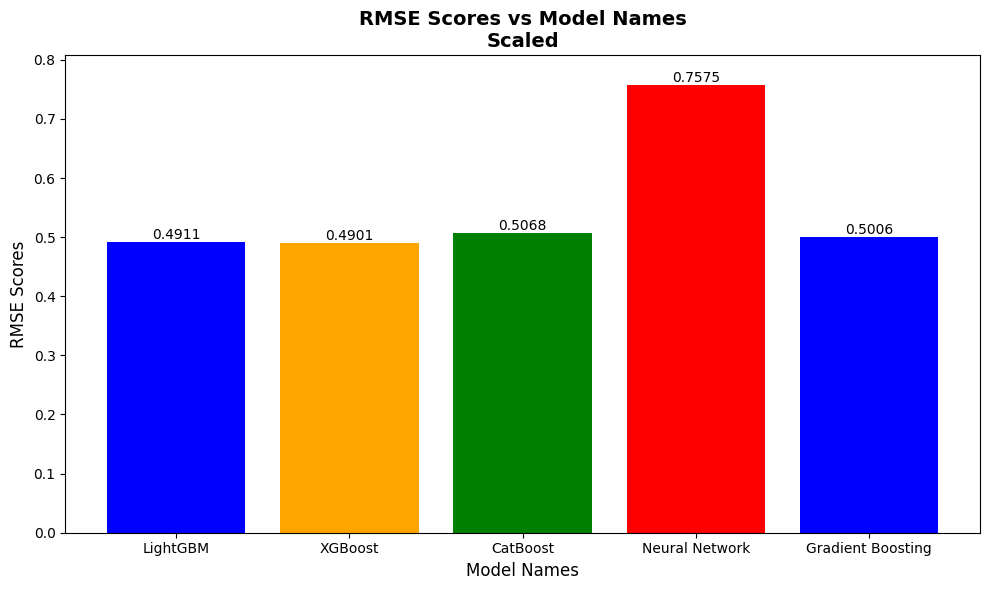

In [ ]:
import matplotlib.pyplot as plt

# Extracting model names and RMSE scores
model_names = list(results.keys())
rmse_scores = [metrics["RMSE"] for metrics in results.values()] # Changed key to "RMSE (Scaled)"

# Plotting the graph
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, rmse_scores, color=["blue", "orange", "green", "red"])

# Adding labels and title
plt.xlabel("Model Names", fontsize=12)
plt.ylabel("RMSE Scores", fontsize=12)
plt.title("RMSE Scores vs Model Names\nScaled", fontsize=14, fontweight='bold')
plt.ylim(0, max(rmse_scores) + 0.05)

# Adding RMSE values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{yval:.4f}", ha="center", va="bottom", fontsize=10)

#  plot
plt.tight_layout()
plt.show()

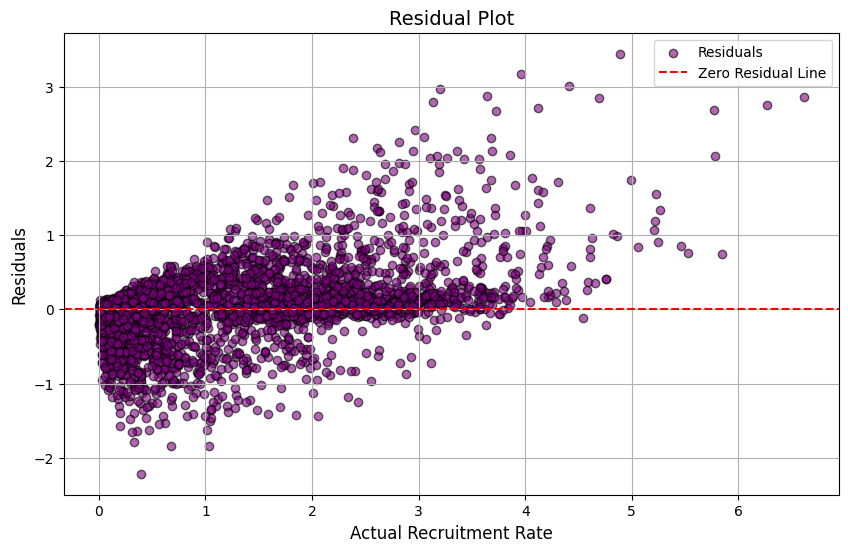

In [ ]:
import matplotlib.pyplot as plt

residuals = y_test_log.ravel() - y_pred_log

plt.figure(figsize=(10, 6))

# Scatter plot for residuals
plt.scatter(y_test_log, residuals, alpha=0.6, label="Residuals", color='purple', edgecolor='k')

# Add reference line at y=0
plt.axhline(0, color="red", linestyle="--", label="Zero Residual Line")

# Add labels and title
plt.xlabel("Actual Recruitment Rate", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Residual Plot", fontsize=14)
plt.legend()
plt.grid(True)

# plot
plt.show()


### Residual Analysis: Standard Scaled vs Log-Transformed Target Variable

#### **First Plot (Standard Scaled Target Variable):**
- The residuals show a significant spread, especially for higher actual recruitment rates.
- The concentration of points around zero is lower, indicating less consistent predictions.
- The model struggles to generalize well for higher recruitment rates, leading to larger residual values.

#### **Second Plot (Log-Transformed Target Variable):**
- The residuals are more evenly distributed around zero with a narrower spread.
- There is better symmetry in the residuals, and fewer extreme deviations are observed.
- The model generalizes better across different ranges of recruitment rates due to the reduced skewness of the target variable.

---

### **Which is Better?**
The residual plot for the **log-transformed target variable** (second plot) is better because:
1. **Symmetry:** The residuals are symmetrically distributed around zero, reducing bias in predictions.
2. **Reduced Spread:** Fewer extreme residuals indicate better handling of higher recruitment rates.
3. **Generalization:** The model performs more consistently across different recruitment rate ranges, highlighting the benefits of addressing skewness with log transformation.

Overall, the log-transformed target variable provides better model performance and residual distribution, making it the preferred choice.


In [ ]:
!pip install properscoring

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Defined a Quantile Regressor for a specific quantile
quantile = 0.9
quantile_model = GradientBoostingRegressor(loss="quantile", alpha=quantile, random_state=42)

# Fit the model to the training data
quantile_model.fit(X_train_combined, y_train)

# Predict quantiles
y_quantile_pred = quantile_model.predict(X_test_combined)
print(f"Predicted {quantile * 100}th Quantile:", y_quantile_pred)


Predicted 90.0th Quantile: [ 0.90942288  0.565789   11.88663859 ...  2.34996985  6.78516812
  1.76088231]


In [ ]:
import numpy as np
correlation = np.corrcoef(y_test, y_pred)[0, 1]
print("Correlation between Actual and Predicted Recruitment Rate:", correlation)

Correlation between Actual and Predicted Recruitment Rate: 0.6788922216576023


## **Correlation Calculation**

- Calculate the Pearson correlation coefficient between the actual and predicted recruitment rates, check the strength and direction of linear relationship.
- **Formula:** The correlation coefficient is calculated as:
  $$
  r = \text{corrcoef}(y_{\text{test}}, y_{\text{pred}})[0, 1]
  $$

**Result:**  
The correlation between Actual and Predicted Recruitment Rate is:
$$
\text{Correlation: } r = 0.67889
$$


## **Residual Plot**

- Residual plot visualizes the difference between actual and predicted values (residuals) to know about the model performance.
- This residual plot shows that most residuals are clustered near zero, with some outliers, indicating generally good model performance
- **Formula for Residuals:**  
  $$
  \text{Residuals} = y_{\text{test}} - y_{\text{pred}}
  $$

- **Graph Description:**
  - **X-Axis:** Actual Recruitment Rate.
  - **Y-Axis:** Residuals (difference between actual and predicted values).
  - The red dashed line at \( y = 0 \) represents the ideal scenario where residuals are zero (perfect predictions).

- **Insights:**
  - Points close to the red line indicate better predictions.
  - Larger residuals (above or below the red line) indicate areas where the model's predictions deviate significantly from actual values.


---


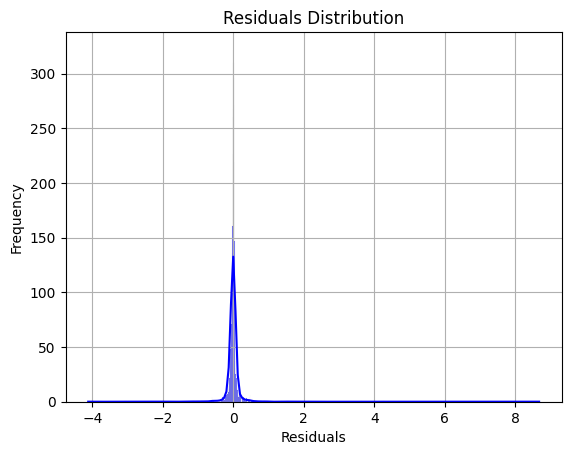

In [ ]:
import seaborn as sns

residuals=y_test_scaled.ravel() - y_pred

sns.histplot(residuals, kde=True, color='blue')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### Residual Analysis: Log-Transformed vs Standard Scaled Target Variable

#### **Log-Transformed Target Variable (First Plot):**
- Residuals are symmetrically distributed around zero, resembling a normal curve.
- The distribution shows minimal skewness and fewer extreme residuals, indicating better handling of outliers.
- The narrow spread suggests improved variance handling and more balanced predictions.

#### **Standard Scaled Target Variable (Second Plot):**
- Residuals are sharply concentrated around zero but show a higher peak and larger extreme values.
- The distribution indicates the model struggles with outliers and predictions for higher recruitment rates.

### **Conclusion:**
The log-transformed residuals are better due to their symmetry, reduced skewness, and improved variance handling, making the model more robust and reliable.


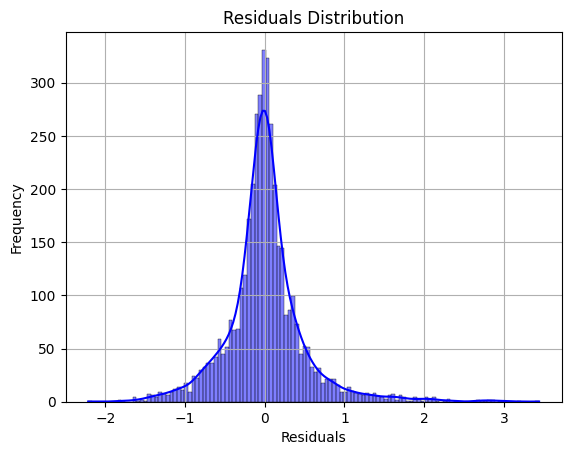

In [ ]:
import seaborn as sns

residuals=y_test_log.ravel()-y_pred_log
sns.histplot(residuals, kde=True, color='blue')
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

## **Residuals Distribution**

-  Analyze the distribution of residuals (differences between actual and predicted values) to know the model's error structure.

- **Description:**
  - **X-Axis:** Residuals (error values).
  - **Y-Axis:** Frequency of residuals.
  - A kernel density estimation (KDE) is overlaid to provide a smooth curve representing the distribution.

- **Insights from the Graph:**
  - **Peak at Zero:** The sharp peak around 0 indicates that most predictions are close to the actual values, suggesting good model performance.
  - **Symmetry:** A symmetric distribution around 0 implies that the errors are evenly distributed and the model does not systematically overpredict or underpredict.
  - **Outliers:** Residuals far from 0 may represent cases where the model struggles to predict accurately.


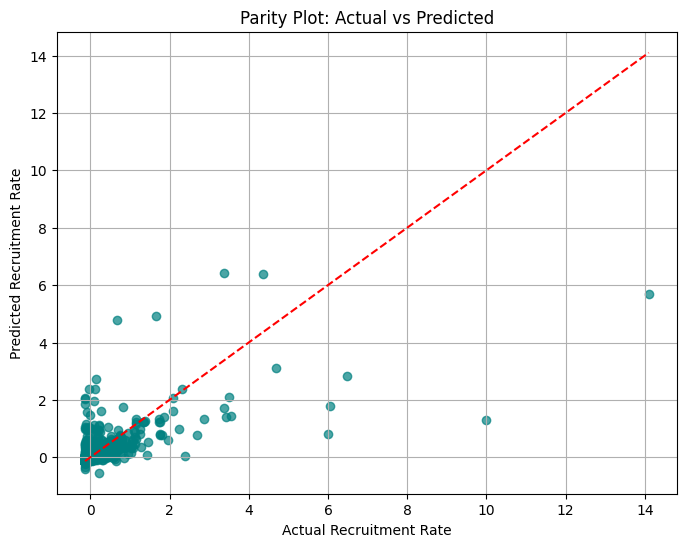

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_scaled, y_pred, alpha=0.7, color='teal')
plt.plot([min(y_test_scaled), max(y_test_scaled)], [min(y_test_scaled), max(y_test_scaled)], color='red', linestyle='--')
plt.title("Parity Plot: Actual vs Predicted")
plt.xlabel("Actual Recruitment Rate")
plt.ylabel("Predicted Recruitment Rate")
plt.grid(True)
plt.show()

## **Parity Plot: Actual vs Predicted for Normal Scaler target Variable**
- From this graph to know how closely the predicted recruitment rates match the actual values.

- **Description:**
  - **X-Axis:** Actual Recruitment Rate.
  - **Y-Axis:** Predicted Recruitment Rate.
  - The **red dashed line** represents the ideal scenario where predicted values perfectly match the actual values ($(y_{\text{pred}} = y_{\text{test}}$)).
  - The **scatter points** represent the actual and predicted recruitment rates for each data point.
---


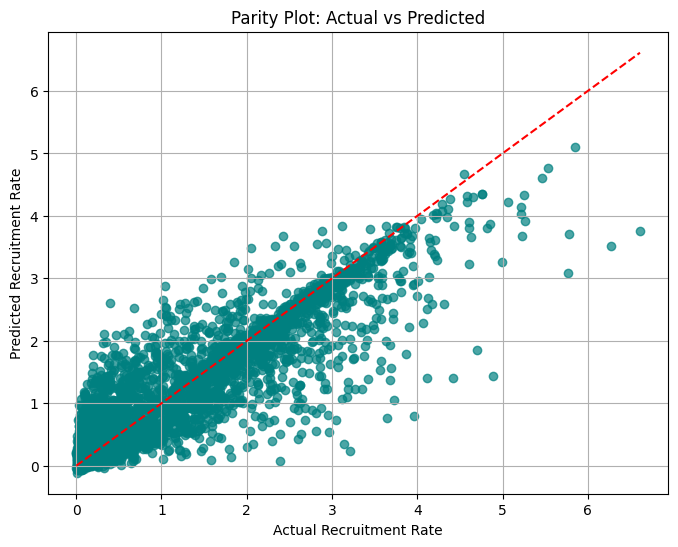

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_log, y_pred_log, alpha=0.7, color='teal')
plt.plot([min(y_test_log), max(y_test_log)], [min(y_test_log), max(y_test_log)], color='red', linestyle='--')
plt.title("Parity Plot: Actual vs Predicted")
plt.xlabel("Actual Recruitment Rate")
plt.ylabel("Predicted Recruitment Rate")
plt.grid(True)
plt.show()

## **Parity Plot: Actual vs Predicted for Log Transformed Target Variable**
- From this graph to know how closely the predicted recruitment rates match the actual values.

- **Description:**
  - **X-Axis:** Actual Recruitment Rate.
  - **Y-Axis:** Predicted Recruitment Rate.
  - The **red dashed line** represents the ideal scenario where predicted values perfectly match the actual values ($(y_{\text{pred}} = y_{\text{test}}$)).
  - The **scatter points** represent the actual and predicted recruitment rates for each data point.
---


For Residual plot in log tranformed target variable.VAriance of target variable is captured more accurately when compared to standardScaling of target variable.

Log Transform approximates the distribution to gaussian distribution wihch is useful for regressor models.

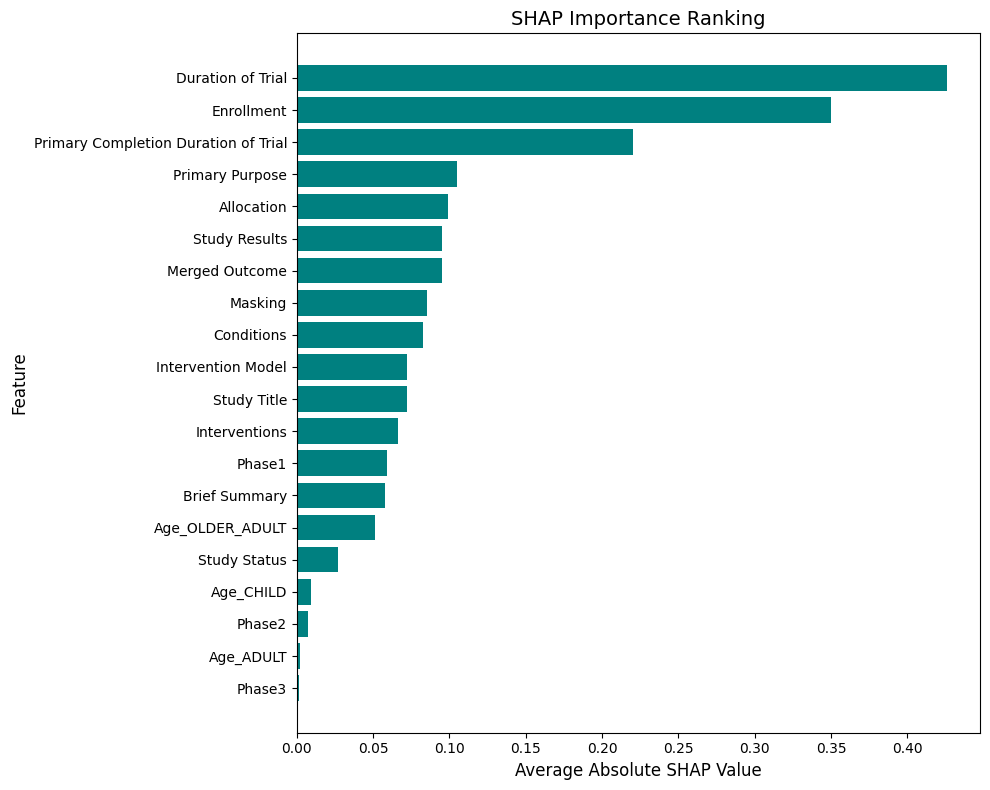

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 1
explainer = shap.TreeExplainer(best_model_log)
shap_values = explainer.shap_values(X_test_combined)

# Step 2:
textual_cols = ['Study Title', 'Brief Summary', 'Conditions', 'Interventions',
                'Allocation', 'Intervention Model', 'Masking', 'Primary Purpose', 'Merged Outcome']
embed_dim = X_train_embeddings.shape[1]
num_textual_cols = len(textual_cols)
embed_per_col = embed_dim // num_textual_cols
textual_shap_values = {}
start_idx = 0
for col in textual_cols:
    end_idx = start_idx + embed_per_col
    textual_shap_values[col] = np.sum(np.abs(shap_values[:, start_idx:end_idx]), axis=1)
    start_idx = end_idx

numerical_cols = ['Enrollment', 'Duration of Trial', 'Primary Completion Duration of Trial',
                  'Phase1', 'Phase2', 'Phase3', 'Age_CHILD', 'Age_ADULT', 'Age_OLDER_ADULT',
                  'Study Status', 'Study Results']
numerical_shap_values = {col: np.abs(shap_values[:, embed_dim + idx]) for idx, col in enumerate(numerical_cols)}

# Step 3:
textual_mean_shap = {col: np.mean(shap_vals) for col, shap_vals in textual_shap_values.items()}
numerical_mean_shap = {col: np.mean(shap_vals) for col, shap_vals in numerical_shap_values.items()}
combined_shap_importance = {**textual_mean_shap, **numerical_mean_shap}
importance_df = pd.DataFrame.from_dict(combined_shap_importance, orient='index', columns=['SHAP Importance'])
importance_df.sort_values(by='SHAP Importance', ascending=True, inplace=True)

# Step 4:
plt.figure(figsize=(10, 8))
plt.barh(importance_df.index, importance_df['SHAP Importance'], color='teal')
plt.xlabel('Average Absolute SHAP Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('SHAP Importance Ranking', fontsize=14)
plt.tight_layout()
plt.show()


## **SHAP Analysis for Feature Importance**

- Evaluate and rank the importance of textual and numerical features in predicting the recruitment rate, using SHAP (SHapley Additive exPlanations) values.
- In this graph, the highest-ranking features significantly influence recruitment rate predictions, allowing us to identify the key drivers behind the model's predictions.
- From the graph result, `Duration of Trial` is the most influential feature, indicating its significant impact on predicting recruitment rates. `Enrollment` and `Primary Completion Duration of Trial` follow closely, highlighting their strong relevance.

---

### **Steps:**
   - The `shap.TreeExplainer` is used to compute SHAP values for the Gradient Boosting model (`gbm`) on the test dataset (`X_test_combined`) for each feature's contribution to model's prediction.
   - **Textual Features:**
     - The embeddings of textual features (e.g., `Study Title`, `Brief Summary`) are aggregated to calculate SHAP importance for each textual column.
   - **Numerical Features:**
     - SHAP values are directly extracted for numerical columns (e.g., `Enrollment`, `Duration of Trial`).
   - Mean SHAP values are calculated for both textual and numerical features.
   - Features are ranked based on their average absolute SHAP values.

   - A horizontal bar chart is created to display the ranked feature importance.
---

Contribution of Features in Log Transformed Scale of target is better explained by SHAP importance when we compare it with Standard Scaled Values.

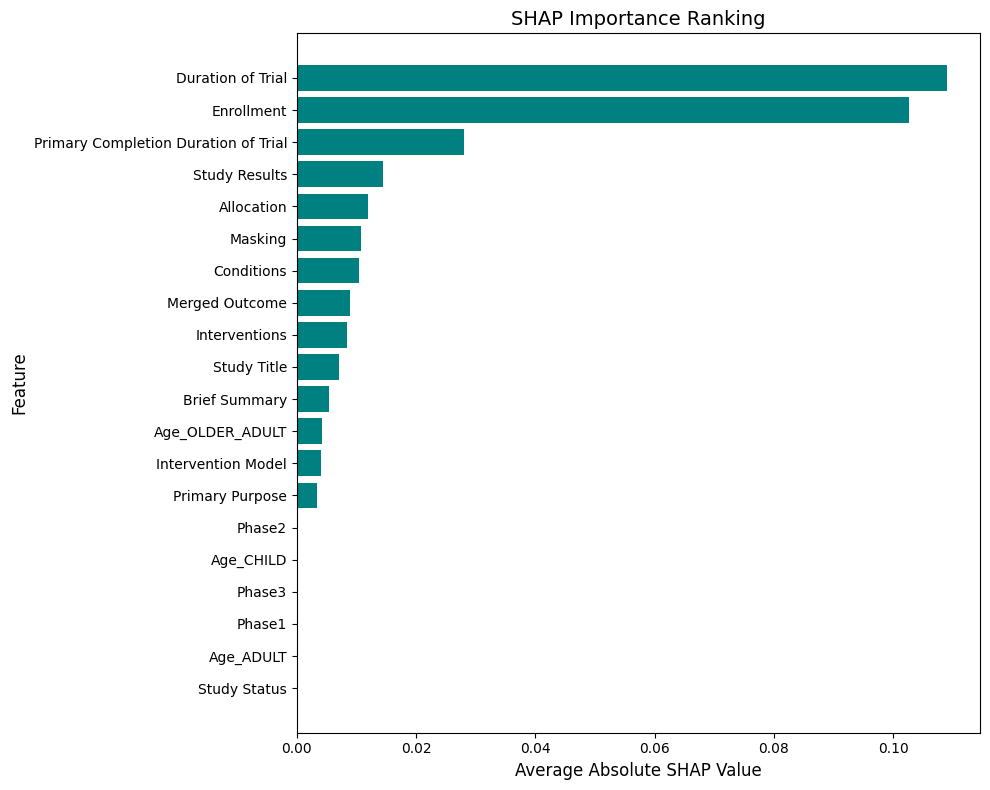

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Step 1
explainer = shap.TreeExplainer(best_model_standard)
shap_values = explainer.shap_values(X_test_combined)

# Step 2:
textual_cols = ['Study Title', 'Brief Summary', 'Conditions', 'Interventions',
                'Allocation', 'Intervention Model', 'Masking', 'Primary Purpose', 'Merged Outcome']
embed_dim = X_train_embeddings.shape[1]
num_textual_cols = len(textual_cols)
embed_per_col = embed_dim // num_textual_cols
textual_shap_values = {}
start_idx = 0
for col in textual_cols:
    end_idx = start_idx + embed_per_col
    textual_shap_values[col] = np.sum(np.abs(shap_values[:, start_idx:end_idx]), axis=1)
    start_idx = end_idx

numerical_cols = ['Enrollment', 'Duration of Trial', 'Primary Completion Duration of Trial',
                  'Phase1', 'Phase2', 'Phase3', 'Age_CHILD', 'Age_ADULT', 'Age_OLDER_ADULT',
                  'Study Status', 'Study Results']
numerical_shap_values = {col: np.abs(shap_values[:, embed_dim + idx]) for idx, col in enumerate(numerical_cols)}

# Step 3:
textual_mean_shap = {col: np.mean(shap_vals) for col, shap_vals in textual_shap_values.items()}
numerical_mean_shap = {col: np.mean(shap_vals) for col, shap_vals in numerical_shap_values.items()}
combined_shap_importance = {**textual_mean_shap, **numerical_mean_shap}
importance_df = pd.DataFrame.from_dict(combined_shap_importance, orient='index', columns=['SHAP Importance'])
importance_df.sort_values(by='SHAP Importance', ascending=True, inplace=True)

# Step 4:
plt.figure(figsize=(10, 8))
plt.barh(importance_df.index, importance_df['SHAP Importance'], color='teal')
plt.xlabel('Average Absolute SHAP Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('SHAP Importance Ranking', fontsize=14)
plt.tight_layout()
plt.show()


### Which is Performing Better?

The **log-transformed target variable (first plot)** appears to be performing better for the following reasons:

- **Better Feature Utilization:** A wider range of features contributes to the predictions, reflecting the model's ability to leverage more information from the dataset.
- **Higher Variability in SHAP Values:** Indicates the model is more sensitive to feature interactions and their nuanced effects.
- **Improved Scalability:** Log transformation mitigates the impact of extreme values, leading to more balanced contributions across features.

### Conclusion:

The first plot, corresponding to the log-transformed target variable, provides a more interpretable and effective representation of feature importance, suggesting that the log transformation improves the model's ability to capture relationships and utilize features optimally.


In [ ]:
import pickle
import numpy as np
from sklearn.utils import resample
import multiprocessing

# Load the saved model from the .pkl file
import joblib # Import joblib instead of pickle

# Load the saved model from the .pkl file
with open('/content/gbm_model_log.pkl', 'rb') as f:
    model = joblib.load(f)  # Use joblib.load to load the model


def bootstrap_iteration(i, model, X_test, y_test):
    # Resample the dataset with replacement
    X_resample, y_resample = resample(X_test_combined, y_test, random_state=i)

    # Fit the model on the resampled data
    model.fit(X_resample, y_resample)

    # Return predictions for the original test data
    return model.predict(X_test)

n_iterations = 40

with multiprocessing.Pool(processes=multiprocessing.cpu_count()) as pool:
    bootstrap_preds = pool.starmap(bootstrap_iteration,
                                  [(i, model, X_test_combined, y_test_log) for i in range(n_iterations)])

bootstrap_preds = np.array(bootstrap_preds)

lower_bound = np.percentile(bootstrap_preds, 2.5, axis=0)
upper_bound = np.percentile(bootstrap_preds, 97.5, axis=0)

confidence_interval = np.array([lower_bound, upper_bound]).T

for i, (lower, upper) in enumerate(confidence_interval):
    print(f"Prediction {i+1}: Confidence Interval (95% CI) = ({lower:.2f}, {upper:.2f})")


## **Bootstrapping Predictions with Confidence Intervals**

- **Purpose:** To estimate prediction uncertainty by generating confidence intervals (CIs) for model predictions using the bootstrap method.

---

### **Steps:**
1. **Model Loading:**
   - The saved Gradient Boosting model is loaded using `joblib` for efficient deserialization.
   
2. **Bootstrapping:**
   - Resampling of the test dataset is performed with replacement (`resample()`).
   - Predictions are generated for the resampled datasets using the loaded model.

3. **Parallelization:**
   - The bootstrap iterations are distributed across CPU cores using `multiprocessing` for faster computation.

4. **Confidence Interval Calculation:**
   - For each prediction, the lower (2.5th percentile) and upper (97.5th percentile) bounds of the 95% confidence interval are computed from the bootstrap predictions.

5. **Output:**
   - Confidence intervals for each test prediction are displayed, providing an estimate of prediction uncertainty.

---

### **Result:**
- **Confidence Intervals:** The 95% CI for each prediction indicates the range of plausible values, reflecting model uncertainty.

---

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.errorbar(range(len(confidence_interval)),
             np.mean(bootstrap_preds, axis=0),
             yerr=[np.mean(bootstrap_preds, axis=0) - confidence_interval[:, 0],
                   confidence_interval[:, 1] - np.mean(bootstrap_preds, axis=0)],
             fmt='o', capsize=5, color='blue', label='Confidence Interval (95%)')
plt.xlabel('Test Sample Index')
plt.ylabel('Prediction Value')
plt.title('Confidence Intervals for Model Predictions')
plt.legend()
plt.savefig('/content/confidence_intervals_plot.png')  # Save the plot as a PNG file
plt.show()

# Automatically download the plot
from google.colab import files
files.download('/content/confidence_intervals_plot_log.png')


## **Confidence Intervals for Model Predictions**

- **Purpose:** Visualize the 95% confidence intervals for predictions on the test set, highlighting prediction uncertainty.

---

### **Plot Description:**
1. **Error Bars:**
   - Points represent the mean predicted values.
   - Error bars indicate the 95% confidence interval for each prediction.
2. **X-Axis:** Test sample index.
3. **Y-Axis:** Prediction values.

---

### **Result:**
- The plot (`confidence_intervals_plot.png`) is saved and available for download.
- **Insights:** Wider intervals indicate higher uncertainty, while narrower intervals reflect more confident predictions.
